# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 18:49:53.291090: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T18:49:56.703747
2025-04-14 18:49:56.703747


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 2
MODEL_TO_USE = 2

# COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 509
INPUT_WINDOW_SIZE = 4
OUTPUT_WINDOW_SIZE = 1
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 18:49:50"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >], dtype=object)

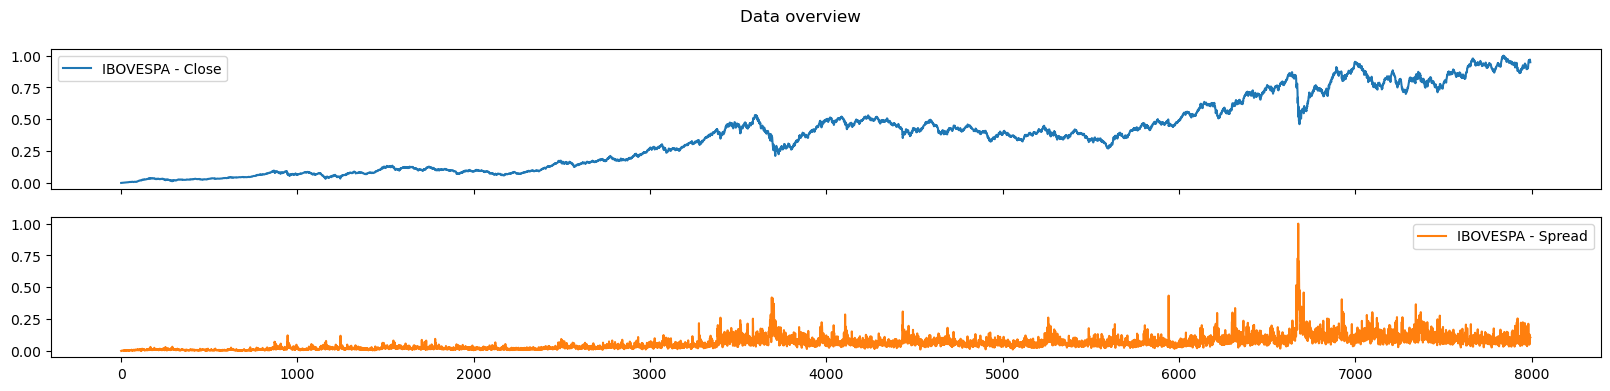

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >], dtype=object)

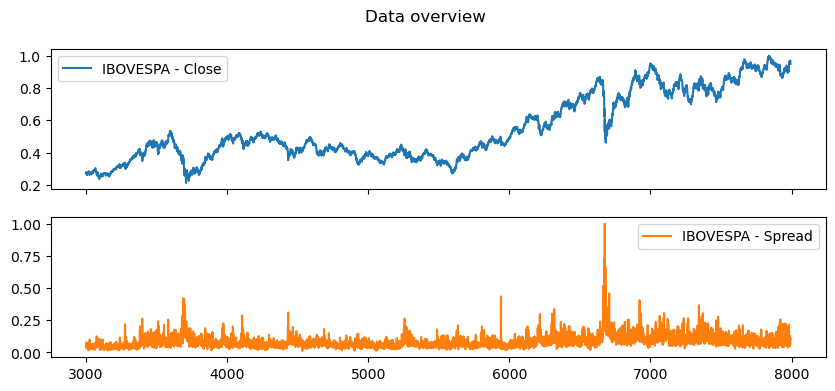

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 0
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Training data size: 7603
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >], dtype=object)

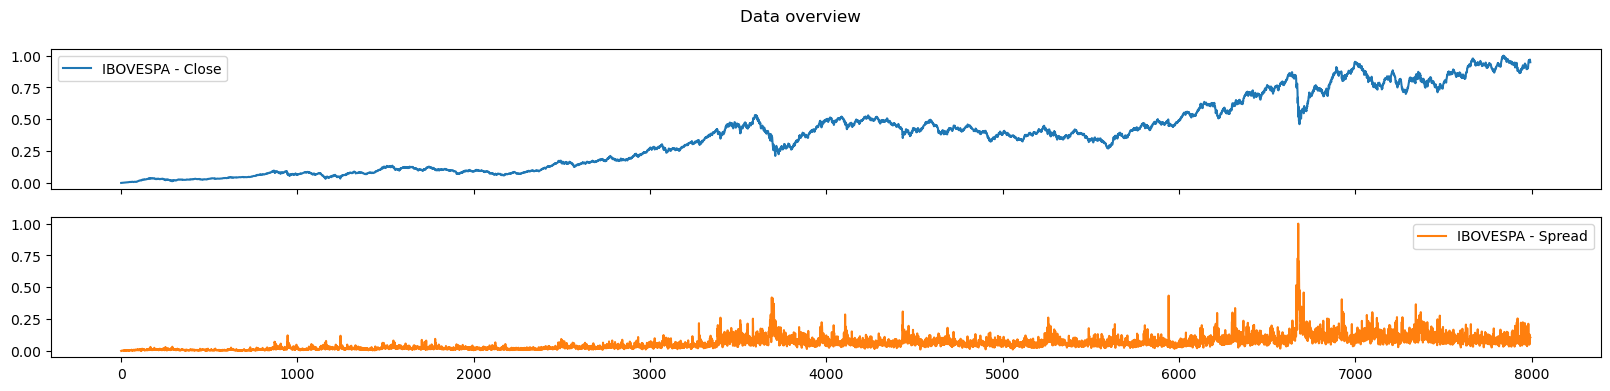

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7603, 261, 129, 7993)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 5
Input indices: [0 1 2 3]
Label indices: [4]
Label column name(s): ['IBOVESPA - Close']

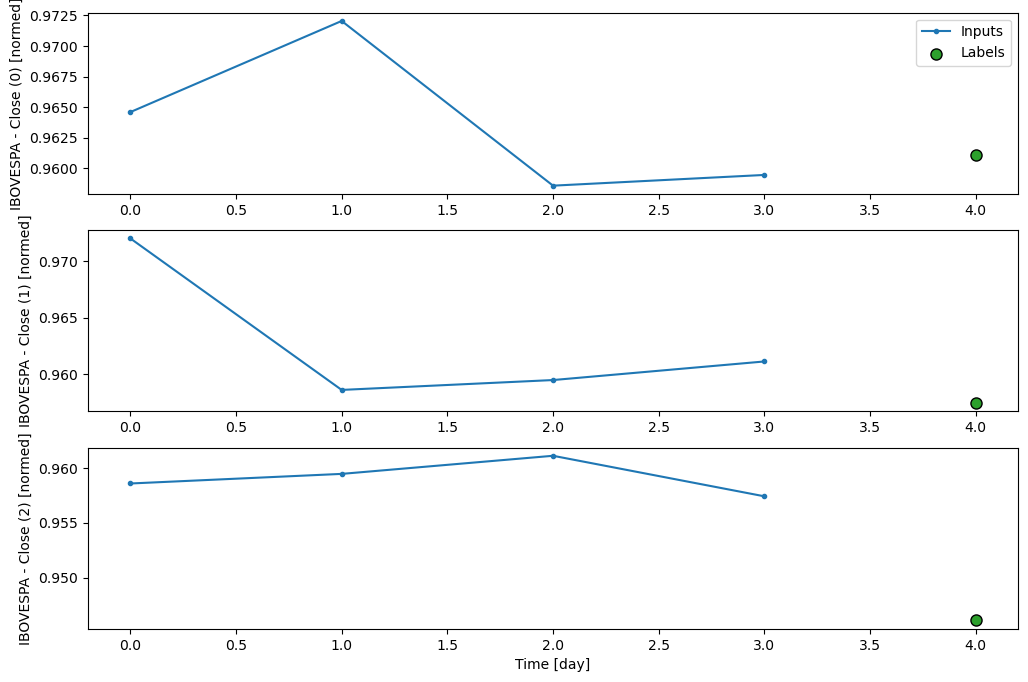

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
# Define the Required Callback Function
class printlearningrate(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        optimizer = self.model.optimizer
        lr = tf.keras.backend.eval(optimizer.learning_rate)
        # lr = tf.keras.backend.eval(optimizer.lr)
        Epoch_count = epoch + 1
        print(f"\nEpoch: {Epoch_count} - LR: {lr}")
        return lr

In [24]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

  # opitimizer AdamW
  # optimizer = tf.keras.optimizers.AdamW(learning_rate=LEARNING_RATE) # weight_decay=0.004
  # optimizer =  tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE, weight_decay=0.004)

  # optimizer =  tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE, weight_decay=1e-6)
  
  def scheduler(epoch, lr):
    decay = LEARNING_DECAY
    decayEveryEpochs = DECAY_EVERY_EPOCHS
    iterations = epoch // decayEveryEpochs
    optimizer = model.optimizer
    # return tf.keras.backend.eval(optimizer.learning_rate)
    # decay by 0.1 every 5 epochs; use `% 1` to decay after each epoch
    if (epoch % decayEveryEpochs == 0) and (epoch != 0):
        lr = lr * (1 - decay)
        lr = lr * (1. / (1. + decay * iterations))
    print(f"Epoch: {epoch} - Learning rate: {optimizer.learning_rate} - LR: {lr}")
    return lr
    return tf.keras.backend.eval(optimizer.learning_rate)
  
  printlr = printlearningrate() 
  updatelr = tf.keras.callbacks.LearningRateScheduler(scheduler)
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr,early_stopping]) # updatelr])
  return history

Definir modelo da rede e realizar o treinamento

In [25]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 4, 2), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [26]:
num_features = df_x_values.shape[1]

num_features

2

In [27]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [28]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [29]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [30]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [31]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 18:57 5s/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 1.0142e-05 - root_mean_squared_error: 0.0032

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 53.4262 - mean_squared_error: 3.2026e-05 - root_mean_squared_error: 0.0054   

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 42.6128 - mean_squared_error: 3.6308e-05 - root_mean_squared_error: 0.0059

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 36.6933 - mean_squared_error: 3.6769e-05 - root_mean_squared_error: 0.0060

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 33.3505 - mean_squared_error: 4.4147e-05 - root_mean_squared_error: 0.0065

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 30.9657 - mean_squared_error: 5.9166e-05 - root_mean_squared_error: 0.0073

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 29.7539 - mean_squared_error: 9.0643e-05 - root_mean_squared_error: 0.0087

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 28.9180 - mean_squared_error: 1.2884e-04 - root_mean_squared_error: 0.0102

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 28.1503 - mean_squared_error: 1.5748e-04 - root_mean_squared_error: 0.0113

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 27.5238 - mean_squared_error: 1.7581e-04 - root_mean_squared_error: 0.0120

 79/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 26.9855 - mean_squared_error: 1.9633e-04 - root_mean_squared_error: 0.0127

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 26.5971 - mean_squared_error: 2.1786e-04 - root_mean_squared_error: 0.0135

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 26.1902 - mean_squared_error: 2.4435e-04 - root_mean_squared_error: 0.0143

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 25.8216 - mean_squared_error: 2.6557e-04 - root_mean_squared_error: 0.0149

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 25.5027 - mean_squared_error: 3.0976e-04 - root_mean_squared_error: 0.0159

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 25.2136 - mean_squared_error: 3.7377e-04 - root_mean_squared_error: 0.0172

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 24.9335 - mean_squared_error: 4.6229e-04 - root_mean_squared_error: 0.0188

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 24.7507 - mean_squared_error: 5.9561e-04 - root_mean_squared_error: 0.0207

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 24.5489 - mean_squared_error: 7.5326e-04 - root_mean_squared_error: 0.0228

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 24.3831 - mean_squared_error: 8.5627e-04 - root_mean_squared_error: 0.0242

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 24.1469 - mean_squared_error: 9.7604e-04 - root_mean_squared_error: 0.0259

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 23.9302 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0272    

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 23.6802 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0285

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 23.4615 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0295

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 23.2259 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0306

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 23.0085 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0317

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 22.8318 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0326

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 22.6781 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0334

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 22.4973 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0342

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 22.3069 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0353

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 22.1720 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0362

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 22.0592 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0369

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 21.9006 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0378


Epoch: 1 - LR: 0.009752360172569752
238/238 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 21.8337 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0382 - val_loss: 0.1685 - val_mean_absolute_error: 0.1685 - val_mean_absolute_percentage_error: 18.0759 - val_mean_squared_error: 0.0299 - val_root_mean_squared_error: 0.1728


Epoch 2/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.7306 - mean_absolute_error: 0.7306 - mean_absolute_percentage_error: 34284.3750 - mean_squared_error: 0.5338 - root_mean_squared_error: 0.7306

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.7067 - mean_absolute_error: 0.7067 - mean_absolute_percentage_error: 14901.1396 - mean_squared_error: 0.5007 - root_mean_squared_error: 0.7073 

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6541 - mean_absolute_error: 0.6541 - mean_absolute_percentage_error: 10552.6816 - mean_squared_error: 0.4409 - root_mean_squared_error: 0.6616

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.5862 - mean_absolute_error: 0.5862 - mean_absolute_percentage_error: 8366.2656 - mean_squared_error: 0.3798 - root_mean_squared_error: 0.6097 

 33/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.5265 - mean_absolute_error: 0.5265 - mean_absolute_percentage_error: 7000.7261 - mean_squared_error: 0.3322 - root_mean_squared_error: 0.5656

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.4767 - mean_absolute_error: 0.4767 - mean_absolute_percentage_error: 6054.7021 - mean_squared_error: 0.2955 - root_mean_squared_error: 0.5293

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.4360 - mean_absolute_error: 0.4360 - mean_absolute_percentage_error: 5356.3574 - mean_squared_error: 0.2666 - root_mean_squared_error: 0.4991

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.4023 - mean_absolute_error: 0.4023 - mean_absolute_percentage_error: 4816.9321 - mean_squared_error: 0.2434 - root_mean_squared_error: 0.4736

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3739 - mean_absolute_error: 0.3739 - mean_absolute_percentage_error: 4386.1694 - mean_squared_error: 0.2242 - root_mean_squared_error: 0.4518

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3526 - mean_absolute_error: 0.3526 - mean_absolute_percentage_error: 4074.0266 - mean_squared_error: 0.2100 - root_mean_squared_error: 0.4351

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3315 - mean_absolute_error: 0.3315 - mean_absolute_percentage_error: 3772.8660 - mean_squared_error: 0.1961 - root_mean_squared_error: 0.4181

 87/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3153 - mean_absolute_error: 0.3153 - mean_absolute_percentage_error: 3547.2312 - mean_squared_error: 0.1855 - root_mean_squared_error: 0.4049

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2990 - mean_absolute_error: 0.2990 - mean_absolute_percentage_error: 3323.4578 - mean_squared_error: 0.1748 - root_mean_squared_error: 0.3913

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2863 - mean_absolute_error: 0.2863 - mean_absolute_percentage_error: 3151.8562 - mean_squared_error: 0.1666 - root_mean_squared_error: 0.3805

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2733 - mean_absolute_error: 0.2733 - mean_absolute_percentage_error: 2978.3135 - mean_squared_error: 0.1582 - root_mean_squared_error: 0.3692

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2619 - mean_absolute_error: 0.2619 - mean_absolute_percentage_error: 2824.7544 - mean_squared_error: 0.1507 - root_mean_squared_error: 0.3590

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2521 - mean_absolute_error: 0.2521 - mean_absolute_percentage_error: 2687.9170 - mean_squared_error: 0.1441 - root_mean_squared_error: 0.3499

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2443 - mean_absolute_error: 0.2443 - mean_absolute_percentage_error: 2579.6868 - mean_squared_error: 0.1388 - root_mean_squared_error: 0.3425

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2371 - mean_absolute_error: 0.2371 - mean_absolute_percentage_error: 2480.6873 - mean_squared_error: 0.1339 - root_mean_squared_error: 0.3355

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2296 - mean_absolute_error: 0.2296 - mean_absolute_percentage_error: 2377.3723 - mean_squared_error: 0.1288 - root_mean_squared_error: 0.3282

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2235 - mean_absolute_error: 0.2235 - mean_absolute_percentage_error: 2294.4639 - mean_squared_error: 0.1247 - root_mean_squared_error: 0.3221

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2170 - mean_absolute_error: 0.2170 - mean_absolute_percentage_error: 2207.1934 - mean_squared_error: 0.1204 - root_mean_squared_error: 0.3156

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2117 - mean_absolute_error: 0.2117 - mean_absolute_percentage_error: 2136.6279 - mean_squared_error: 0.1168 - root_mean_squared_error: 0.3103

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2068 - mean_absolute_error: 0.2068 - mean_absolute_percentage_error: 2070.8726 - mean_squared_error: 0.1135 - root_mean_squared_error: 0.3052

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2034 - mean_absolute_error: 0.2034 - mean_absolute_percentage_error: 2026.5764 - mean_squared_error: 0.1113 - root_mean_squared_error: 0.3018

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1984 - mean_absolute_error: 0.1984 - mean_absolute_percentage_error: 1959.9066 - mean_squared_error: 0.1079 - root_mean_squared_error: 0.2965

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1944 - mean_absolute_error: 0.1944 - mean_absolute_percentage_error: 1905.4323 - mean_squared_error: 0.1052 - root_mean_squared_error: 0.2922

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1901 - mean_absolute_error: 0.1901 - mean_absolute_percentage_error: 1847.1288 - mean_squared_error: 0.1022 - root_mean_squared_error: 0.2875

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1867 - mean_absolute_error: 0.1867 - mean_absolute_percentage_error: 1799.2467 - mean_squared_error: 0.0998 - root_mean_squared_error: 0.2837

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1830 - mean_absolute_error: 0.1830 - mean_absolute_percentage_error: 1747.7699 - mean_squared_error: 0.0972 - root_mean_squared_error: 0.2795

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1799 - mean_absolute_error: 0.1799 - mean_absolute_percentage_error: 1705.3193 - mean_squared_error: 0.0951 - root_mean_squared_error: 0.2760

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1767 - mean_absolute_error: 0.1767 - mean_absolute_percentage_error: 1659.4995 - mean_squared_error: 0.0928 - root_mean_squared_error: 0.2722


Epoch: 2 - LR: 0.009510851465165615
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1751 - mean_absolute_error: 0.1751 - mean_absolute_percentage_error: 1637.6025 - mean_squared_error: 0.0917 - root_mean_squared_error: 0.2704 - val_loss: 0.1053 - val_mean_absolute_error: 0.1053 - val_mean_absolute_percentage_error: 11.2326 - val_mean_squared_error: 0.0125 - val_root_mean_squared_error: 0.1117


Epoch 3/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.6957 - mean_absolute_error: 0.6957 - mean_absolute_percentage_error: 32637.9336 - mean_squared_error: 0.4840 - root_mean_squared_error: 0.6957

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6787 - mean_absolute_error: 0.6787 - mean_absolute_percentage_error: 15087.4717 - mean_squared_error: 0.4615 - root_mean_squared_error: 0.6792 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6372 - mean_absolute_error: 0.6372 - mean_absolute_percentage_error: 10428.9375 - mean_squared_error: 0.4118 - root_mean_squared_error: 0.6402

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.5935 - mean_absolute_error: 0.5935 - mean_absolute_percentage_error: 8456.9199 - mean_squared_error: 0.3690 - root_mean_squared_error: 0.6037 

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.5419 - mean_absolute_error: 0.5419 - mean_absolute_percentage_error: 7030.5293 - mean_squared_error: 0.3259 - root_mean_squared_error: 0.5638

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.4966 - mean_absolute_error: 0.4966 - mean_absolute_percentage_error: 6057.6021 - mean_squared_error: 0.2914 - root_mean_squared_error: 0.5296

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.4626 - mean_absolute_error: 0.4626 - mean_absolute_percentage_error: 5425.0806 - mean_squared_error: 0.2669 - root_mean_squared_error: 0.5040

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.4288 - mean_absolute_error: 0.4288 - mean_absolute_percentage_error: 4861.3955 - mean_squared_error: 0.2439 - root_mean_squared_error: 0.4787

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.4031 - mean_absolute_error: 0.4031 - mean_absolute_percentage_error: 4465.3931 - mean_squared_error: 0.2270 - root_mean_squared_error: 0.4594

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3776 - mean_absolute_error: 0.3776 - mean_absolute_percentage_error: 4092.7983 - mean_squared_error: 0.2106 - root_mean_squared_error: 0.4401

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3583 - mean_absolute_error: 0.3583 - mean_absolute_percentage_error: 3819.5103 - mean_squared_error: 0.1983 - root_mean_squared_error: 0.4251

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3387 - mean_absolute_error: 0.3387 - mean_absolute_percentage_error: 3553.0437 - mean_squared_error: 0.1861 - root_mean_squared_error: 0.4098

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3234 - mean_absolute_error: 0.3234 - mean_absolute_percentage_error: 3351.6375 - mean_squared_error: 0.1767 - root_mean_squared_error: 0.3977

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3079 - mean_absolute_error: 0.3079 - mean_absolute_percentage_error: 3150.4739 - mean_squared_error: 0.1671 - root_mean_squared_error: 0.3852

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2957 - mean_absolute_error: 0.2957 - mean_absolute_percentage_error: 2995.2559 - mean_squared_error: 0.1597 - root_mean_squared_error: 0.3752

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2831 - mean_absolute_error: 0.2831 - mean_absolute_percentage_error: 2837.4226 - mean_squared_error: 0.1521 - root_mean_squared_error: 0.3647

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2732 - mean_absolute_error: 0.2732 - mean_absolute_percentage_error: 2713.7307 - mean_squared_error: 0.1461 - root_mean_squared_error: 0.3563

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2630 - mean_absolute_error: 0.2630 - mean_absolute_percentage_error: 2586.2708 - mean_squared_error: 0.1398 - root_mean_squared_error: 0.3474

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2548 - mean_absolute_error: 0.2548 - mean_absolute_percentage_error: 2485.1580 - mean_squared_error: 0.1348 - root_mean_squared_error: 0.3401

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2462 - mean_absolute_error: 0.2462 - mean_absolute_percentage_error: 2379.8064 - mean_squared_error: 0.1296 - root_mean_squared_error: 0.3324

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2393 - mean_absolute_error: 0.2393 - mean_absolute_percentage_error: 2295.4053 - mean_squared_error: 0.1254 - root_mean_squared_error: 0.3261

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2319 - mean_absolute_error: 0.2319 - mean_absolute_percentage_error: 2206.6990 - mean_squared_error: 0.1209 - root_mean_squared_error: 0.3194

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2258 - mean_absolute_error: 0.2258 - mean_absolute_percentage_error: 2135.0684 - mean_squared_error: 0.1173 - root_mean_squared_error: 0.3138

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2194 - mean_absolute_error: 0.2194 - mean_absolute_percentage_error: 2059.2480 - mean_squared_error: 0.1134 - root_mean_squared_error: 0.3078

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2141 - mean_absolute_error: 0.2141 - mean_absolute_percentage_error: 1997.6263 - mean_squared_error: 0.1103 - root_mean_squared_error: 0.3028

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2093 - mean_absolute_error: 0.2093 - mean_absolute_percentage_error: 1939.9685 - mean_squared_error: 0.1074 - root_mean_squared_error: 0.2981

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2042 - mean_absolute_error: 0.2042 - mean_absolute_percentage_error: 1878.4261 - mean_squared_error: 0.1042 - root_mean_squared_error: 0.2931

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2000 - mean_absolute_error: 0.2000 - mean_absolute_percentage_error: 1828.0049 - mean_squared_error: 0.1016 - root_mean_squared_error: 0.2889

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1954 - mean_absolute_error: 0.1954 - mean_absolute_percentage_error: 1773.9154 - mean_squared_error: 0.0989 - root_mean_squared_error: 0.2843

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1918 - mean_absolute_error: 0.1918 - mean_absolute_percentage_error: 1729.4137 - mean_squared_error: 0.0966 - root_mean_squared_error: 0.2806

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1884 - mean_absolute_error: 0.1884 - mean_absolute_percentage_error: 1687.3101 - mean_squared_error: 0.0944 - root_mean_squared_error: 0.2770

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1851 - mean_absolute_error: 0.1851 - mean_absolute_percentage_error: 1647.4054 - mean_squared_error: 0.0924 - root_mean_squared_error: 0.2736


Epoch: 3 - LR: 0.009275324642658234
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1821 - mean_absolute_error: 0.1821 - mean_absolute_percentage_error: 1609.5377 - mean_squared_error: 0.0905 - root_mean_squared_error: 0.2703 - val_loss: 0.0873 - val_mean_absolute_error: 0.0873 - val_mean_absolute_percentage_error: 9.2952 - val_mean_squared_error: 0.0089 - val_root_mean_squared_error: 0.0941


Epoch 4/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.4667 - mean_absolute_error: 0.4667 - mean_absolute_percentage_error: 21890.9844 - mean_squared_error: 0.2178 - root_mean_squared_error: 0.4667

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.4442 - mean_absolute_error: 0.4442 - mean_absolute_percentage_error: 9475.9902 - mean_squared_error: 0.1983 - root_mean_squared_error: 0.4450  

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.4021 - mean_absolute_error: 0.4021 - mean_absolute_percentage_error: 6667.6582 - mean_squared_error: 0.1692 - root_mean_squared_error: 0.4090

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3603 - mean_absolute_error: 0.3603 - mean_absolute_percentage_error: 5277.5815 - mean_squared_error: 0.1454 - root_mean_squared_error: 0.3765

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3272 - mean_absolute_error: 0.3272 - mean_absolute_percentage_error: 4501.0728 - mean_squared_error: 0.1289 - root_mean_squared_error: 0.3521

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2994 - mean_absolute_error: 0.2994 - mean_absolute_percentage_error: 3943.5996 - mean_squared_error: 0.1160 - root_mean_squared_error: 0.3316

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2730 - mean_absolute_error: 0.2730 - mean_absolute_percentage_error: 3469.2314 - mean_squared_error: 0.1042 - root_mean_squared_error: 0.3120

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2538 - mean_absolute_error: 0.2538 - mean_absolute_percentage_error: 3147.5730 - mean_squared_error: 0.0959 - root_mean_squared_error: 0.2975

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2354 - mean_absolute_error: 0.2354 - mean_absolute_percentage_error: 2852.7666 - mean_squared_error: 0.0880 - root_mean_squared_error: 0.2832

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2217 - mean_absolute_error: 0.2217 - mean_absolute_percentage_error: 2641.1067 - mean_squared_error: 0.0822 - root_mean_squared_error: 0.2723

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2082 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 2438.4207 - mean_squared_error: 0.0766 - root_mean_squared_error: 0.2613

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1978 - mean_absolute_error: 0.1978 - mean_absolute_percentage_error: 2287.4631 - mean_squared_error: 0.0723 - root_mean_squared_error: 0.2528

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1874 - mean_absolute_error: 0.1874 - mean_absolute_percentage_error: 2138.5027 - mean_squared_error: 0.0680 - root_mean_squared_error: 0.2440

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1793 - mean_absolute_error: 0.1793 - mean_absolute_percentage_error: 2024.7583 - mean_squared_error: 0.0647 - root_mean_squared_error: 0.2371

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1711 - mean_absolute_error: 0.1711 - mean_absolute_percentage_error: 1910.1709 - mean_squared_error: 0.0614 - root_mean_squared_error: 0.2299

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1647 - mean_absolute_error: 0.1647 - mean_absolute_percentage_error: 1821.0856 - mean_squared_error: 0.0587 - root_mean_squared_error: 0.2242

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1582 - mean_absolute_error: 0.1582 - mean_absolute_percentage_error: 1729.9231 - mean_squared_error: 0.0560 - root_mean_squared_error: 0.2182

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1530 - mean_absolute_error: 0.1530 - mean_absolute_percentage_error: 1658.0702 - mean_squared_error: 0.0539 - root_mean_squared_error: 0.2133

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1477 - mean_absolute_error: 0.1477 - mean_absolute_percentage_error: 1583.6331 - mean_squared_error: 0.0517 - root_mean_squared_error: 0.2082

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1434 - mean_absolute_error: 0.1434 - mean_absolute_percentage_error: 1524.3019 - mean_squared_error: 0.0499 - root_mean_squared_error: 0.2040

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1405 - mean_absolute_error: 0.1405 - mean_absolute_percentage_error: 1484.8412 - mean_squared_error: 0.0487 - root_mean_squared_error: 0.2012

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1388 - mean_absolute_error: 0.1388 - mean_absolute_percentage_error: 1462.2297 - mean_squared_error: 0.0480 - root_mean_squared_error: 0.1995

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1377 - mean_absolute_error: 0.1377 - mean_absolute_percentage_error: 1447.5736 - mean_squared_error: 0.0476 - root_mean_squared_error: 0.1985

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1346 - mean_absolute_error: 0.1346 - mean_absolute_percentage_error: 1405.4905 - mean_squared_error: 0.0463 - root_mean_squared_error: 0.1954

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1311 - mean_absolute_error: 0.1311 - mean_absolute_percentage_error: 1359.6792 - mean_squared_error: 0.0449 - root_mean_squared_error: 0.1919

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1274 - mean_absolute_error: 0.1274 - mean_absolute_percentage_error: 1311.1914 - mean_squared_error: 0.0434 - root_mean_squared_error: 0.1882

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1244 - mean_absolute_error: 0.1244 - mean_absolute_percentage_error: 1271.7869 - mean_squared_error: 0.0422 - root_mean_squared_error: 0.1852

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1216 - mean_absolute_error: 0.1216 - mean_absolute_percentage_error: 1234.9072 - mean_squared_error: 0.0410 - root_mean_squared_error: 0.1822

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1189 - mean_absolute_error: 0.1189 - mean_absolute_percentage_error: 1200.3104 - mean_squared_error: 0.0400 - root_mean_squared_error: 0.1795

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1161 - mean_absolute_error: 0.1161 - mean_absolute_percentage_error: 1163.2952 - mean_squared_error: 0.0388 - root_mean_squared_error: 0.1765

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1137 - mean_absolute_error: 0.1137 - mean_absolute_percentage_error: 1132.9072 - mean_squared_error: 0.0379 - root_mean_squared_error: 0.1740

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1113 - mean_absolute_error: 0.1113 - mean_absolute_percentage_error: 1100.2561 - mean_squared_error: 0.0368 - root_mean_squared_error: 0.1713

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1094 - mean_absolute_error: 0.1094 - mean_absolute_percentage_error: 1073.3453 - mean_squared_error: 0.0360 - root_mean_squared_error: 0.1692

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1073 - mean_absolute_error: 0.1073 - mean_absolute_percentage_error: 1044.3113 - mean_squared_error: 0.0351 - root_mean_squared_error: 0.1668


Epoch: 4 - LR: 0.009045630693435669
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1060 - mean_absolute_error: 0.1060 - mean_absolute_percentage_error: 1027.0333 - mean_squared_error: 0.0346 - root_mean_squared_error: 0.1654 - val_loss: 0.0246 - val_mean_absolute_error: 0.0246 - val_mean_absolute_percentage_error: 2.6452 - val_mean_squared_error: 9.1534e-04 - val_root_mean_squared_error: 0.0303


Epoch 5/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 2:29 631ms/step - loss: 0.2539 - mean_absolute_error: 0.2539 - mean_absolute_percentage_error: 11937.1230 - mean_squared_error: 0.0645 - root_mean_squared_error: 0.2539

  7/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.2348 - mean_absolute_error: 0.2348 - mean_absolute_percentage_error: 5819.1221 - mean_squared_error: 0.0558 - root_mean_squared_error: 0.2359     

 12/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.2090 - mean_absolute_error: 0.2090 - mean_absolute_percentage_error: 4313.4810 - mean_squared_error: 0.0470 - root_mean_squared_error: 0.2148

 17/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1866 - mean_absolute_error: 0.1866 - mean_absolute_percentage_error: 3493.3452 - mean_squared_error: 0.0402 - root_mean_squared_error: 0.1972

 23/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1653 - mean_absolute_error: 0.1653 - mean_absolute_percentage_error: 2878.4287 - mean_squared_error: 0.0344 - root_mean_squared_error: 0.1806

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1463 - mean_absolute_error: 0.1463 - mean_absolute_percentage_error: 2409.6968 - mean_squared_error: 0.0295 - root_mean_squared_error: 0.1657

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1319 - mean_absolute_error: 0.1319 - mean_absolute_percentage_error: 2085.1199 - mean_squared_error: 0.0260 - root_mean_squared_error: 0.1540 

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1192 - mean_absolute_error: 0.1192 - mean_absolute_percentage_error: 1816.3672 - mean_squared_error: 0.0230 - root_mean_squared_error: 0.1435

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1103 - mean_absolute_error: 0.1103 - mean_absolute_percentage_error: 1637.4628 - mean_squared_error: 0.0209 - root_mean_squared_error: 0.1360

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1019 - mean_absolute_error: 0.1019 - mean_absolute_percentage_error: 1475.5977 - mean_squared_error: 0.0190 - root_mean_squared_error: 0.1287

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0957 - mean_absolute_error: 0.0957 - mean_absolute_percentage_error: 1360.5688 - mean_squared_error: 0.0176 - root_mean_squared_error: 0.1233

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0897 - mean_absolute_error: 0.0897 - mean_absolute_percentage_error: 1251.4843 - mean_squared_error: 0.0163 - root_mean_squared_error: 0.1179

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0853 - mean_absolute_error: 0.0853 - mean_absolute_percentage_error: 1170.8953 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1138

 90/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0809 - mean_absolute_error: 0.0809 - mean_absolute_percentage_error: 1091.8594 - mean_squared_error: 0.0144 - root_mean_squared_error: 0.1096

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0776 - mean_absolute_error: 0.0776 - mean_absolute_percentage_error: 1031.8065 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1063

105/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0741 - mean_absolute_error: 0.0741 - mean_absolute_percentage_error: 971.5405 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1029 

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0715 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 924.8515 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1002

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0688 - mean_absolute_error: 0.0688 - mean_absolute_percentage_error: 877.2277 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.0975

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0665 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 834.7501 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.0950

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0647 - mean_absolute_error: 0.0647 - mean_absolute_percentage_error: 801.1580 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0930

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0629 - mean_absolute_error: 0.0629 - mean_absolute_percentage_error: 766.2495 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0910

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0614 - mean_absolute_error: 0.0614 - mean_absolute_percentage_error: 738.3446 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0893

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 709.0730 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0875

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 685.4772 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0860

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 660.5423 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0844

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 640.3062 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0831

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 618.7880 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0816

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 601.2232 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0804

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 584.7230 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0793

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 571.3526 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0784

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 558.6403 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0775

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 546.5386 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0767

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 531.2776 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0758

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 516.9315 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0749


Epoch: 5 - LR: 0.008821624331176281
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 511.7741 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0747 - val_loss: 0.0291 - val_mean_absolute_error: 0.0291 - val_mean_absolute_percentage_error: 3.0963 - val_mean_squared_error: 0.0012 - val_root_mean_squared_error: 0.0339


Epoch 6/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.2563 - mean_absolute_error: 0.2563 - mean_absolute_percentage_error: 12046.4180 - mean_squared_error: 0.0657 - root_mean_squared_error: 0.2563

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2400 - mean_absolute_error: 0.2400 - mean_absolute_percentage_error: 5512.2974 - mean_squared_error: 0.0581 - root_mean_squared_error: 0.2407  

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2090 - mean_absolute_error: 0.2090 - mean_absolute_percentage_error: 3737.5120 - mean_squared_error: 0.0472 - root_mean_squared_error: 0.2153

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1820 - mean_absolute_error: 0.1820 - mean_absolute_percentage_error: 2904.7815 - mean_squared_error: 0.0392 - root_mean_squared_error: 0.1941

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1613 - mean_absolute_error: 0.1613 - mean_absolute_percentage_error: 2403.6587 - mean_squared_error: 0.0336 - root_mean_squared_error: 0.1779

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1454 - mean_absolute_error: 0.1454 - mean_absolute_percentage_error: 2064.4692 - mean_squared_error: 0.0295 - root_mean_squared_error: 0.1653

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1328 - mean_absolute_error: 0.1328 - mean_absolute_percentage_error: 1817.8923 - mean_squared_error: 0.0264 - root_mean_squared_error: 0.1551

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1238 - mean_absolute_error: 0.1238 - mean_absolute_percentage_error: 1650.4830 - mean_squared_error: 0.0242 - root_mean_squared_error: 0.1477

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1152 - mean_absolute_error: 0.1152 - mean_absolute_percentage_error: 1496.8622 - mean_squared_error: 0.0222 - root_mean_squared_error: 0.1405

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1088 - mean_absolute_error: 0.1088 - mean_absolute_percentage_error: 1386.4613 - mean_squared_error: 0.0207 - root_mean_squared_error: 0.1350

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1026 - mean_absolute_error: 0.1026 - mean_absolute_percentage_error: 1280.7888 - mean_squared_error: 0.0193 - root_mean_squared_error: 0.1295

 85/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0980 - mean_absolute_error: 0.0980 - mean_absolute_percentage_error: 1202.1089 - mean_squared_error: 0.0182 - root_mean_squared_error: 0.1253

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0940 - mean_absolute_error: 0.0940 - mean_absolute_percentage_error: 1133.5190 - mean_squared_error: 0.0172 - root_mean_squared_error: 0.1215

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0903 - mean_absolute_error: 0.0903 - mean_absolute_percentage_error: 1073.1096 - mean_squared_error: 0.0164 - root_mean_squared_error: 0.1180

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0866 - mean_absolute_error: 0.0866 - mean_absolute_percentage_error: 1012.2721 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1145

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0837 - mean_absolute_error: 0.0837 - mean_absolute_percentage_error: 964.9968 - mean_squared_error: 0.0149 - root_mean_squared_error: 0.1117 

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0809 - mean_absolute_error: 0.0809 - mean_absolute_percentage_error: 916.6416 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1088

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0786 - mean_absolute_error: 0.0786 - mean_absolute_percentage_error: 878.5411 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1065

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0766 - mean_absolute_error: 0.0766 - mean_absolute_percentage_error: 843.8049 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1044

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0745 - mean_absolute_error: 0.0745 - mean_absolute_percentage_error: 807.6489 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1021

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0725 - mean_absolute_error: 0.0725 - mean_absolute_percentage_error: 774.7601 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1000

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0707 - mean_absolute_error: 0.0707 - mean_absolute_percentage_error: 744.6995 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.0981

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0691 - mean_absolute_error: 0.0691 - mean_absolute_percentage_error: 720.4329 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.0965

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0675 - mean_absolute_error: 0.0675 - mean_absolute_percentage_error: 694.7524 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0947

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0662 - mean_absolute_error: 0.0662 - mean_absolute_percentage_error: 673.8898 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0933

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0648 - mean_absolute_error: 0.0648 - mean_absolute_percentage_error: 651.6845 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0917

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0637 - mean_absolute_error: 0.0637 - mean_absolute_percentage_error: 633.5380 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0905

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0625 - mean_absolute_error: 0.0625 - mean_absolute_percentage_error: 614.1172 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0891

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0615 - mean_absolute_error: 0.0615 - mean_absolute_percentage_error: 598.1696 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0879

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0605 - mean_absolute_error: 0.0605 - mean_absolute_percentage_error: 583.1096 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0868

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 570.8506 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0860

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 559.1464 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0851

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0583 - mean_absolute_error: 0.0583 - mean_absolute_percentage_error: 546.1433 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0841


Epoch: 6 - LR: 0.008603165857493877
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0581 - mean_absolute_error: 0.0581 - mean_absolute_percentage_error: 544.3428 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0840 - val_loss: 0.0332 - val_mean_absolute_error: 0.0332 - val_mean_absolute_percentage_error: 3.5417 - val_mean_squared_error: 0.0013 - val_root_mean_squared_error: 0.0365


Epoch 7/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 0.3118 - mean_absolute_error: 0.3118 - mean_absolute_percentage_error: 14654.5527 - mean_squared_error: 0.0972 - root_mean_squared_error: 0.3118

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2933 - mean_absolute_error: 0.2933 - mean_absolute_percentage_error: 6320.5435 - mean_squared_error: 0.0865 - root_mean_squared_error: 0.2939  

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2684 - mean_absolute_error: 0.2684 - mean_absolute_percentage_error: 4456.6040 - mean_squared_error: 0.0746 - root_mean_squared_error: 0.2717

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2398 - mean_absolute_error: 0.2398 - mean_absolute_percentage_error: 3525.8943 - mean_squared_error: 0.0638 - root_mean_squared_error: 0.2495

 33/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2176 - mean_absolute_error: 0.2176 - mean_absolute_percentage_error: 2950.7778 - mean_squared_error: 0.0559 - root_mean_squared_error: 0.2318

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2016 - mean_absolute_error: 0.2016 - mean_absolute_percentage_error: 2597.0688 - mean_squared_error: 0.0505 - root_mean_squared_error: 0.2190

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1864 - mean_absolute_error: 0.1864 - mean_absolute_percentage_error: 2294.5322 - mean_squared_error: 0.0456 - root_mean_squared_error: 0.2067

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1754 - mean_absolute_error: 0.1754 - mean_absolute_percentage_error: 2088.1758 - mean_squared_error: 0.0422 - root_mean_squared_error: 0.1976

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1648 - mean_absolute_error: 0.1648 - mean_absolute_percentage_error: 1898.3153 - mean_squared_error: 0.0389 - root_mean_squared_error: 0.1887

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1567 - mean_absolute_error: 0.1567 - mean_absolute_percentage_error: 1761.3462 - mean_squared_error: 0.0364 - root_mean_squared_error: 0.1819

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1494 - mean_absolute_error: 0.1494 - mean_absolute_percentage_error: 1644.7885 - mean_squared_error: 0.0343 - root_mean_squared_error: 0.1757

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1438 - mean_absolute_error: 0.1438 - mean_absolute_percentage_error: 1557.7830 - mean_squared_error: 0.0327 - root_mean_squared_error: 0.1710

 90/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1378 - mean_absolute_error: 0.1378 - mean_absolute_percentage_error: 1468.4335 - mean_squared_error: 0.0310 - root_mean_squared_error: 0.1659

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1324 - mean_absolute_error: 0.1324 - mean_absolute_percentage_error: 1389.8131 - mean_squared_error: 0.0295 - root_mean_squared_error: 0.1613

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1269 - mean_absolute_error: 0.1269 - mean_absolute_percentage_error: 1310.7111 - mean_squared_error: 0.0280 - root_mean_squared_error: 0.1565

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1226 - mean_absolute_error: 0.1226 - mean_absolute_percentage_error: 1249.2690 - mean_squared_error: 0.0268 - root_mean_squared_error: 0.1526

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1180 - mean_absolute_error: 0.1180 - mean_absolute_percentage_error: 1186.4390 - mean_squared_error: 0.0256 - root_mean_squared_error: 0.1486

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1144 - mean_absolute_error: 0.1144 - mean_absolute_percentage_error: 1136.9532 - mean_squared_error: 0.0246 - root_mean_squared_error: 0.1453

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1106 - mean_absolute_error: 0.1106 - mean_absolute_percentage_error: 1085.7202 - mean_squared_error: 0.0236 - root_mean_squared_error: 0.1419

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1071 - mean_absolute_error: 0.1071 - mean_absolute_percentage_error: 1039.3524 - mean_squared_error: 0.0227 - root_mean_squared_error: 0.1386

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1043 - mean_absolute_error: 0.1043 - mean_absolute_percentage_error: 1002.2319 - mean_squared_error: 0.0220 - root_mean_squared_error: 0.1360

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1017 - mean_absolute_error: 0.1017 - mean_absolute_percentage_error: 967.9304 - mean_squared_error: 0.0213 - root_mean_squared_error: 0.1335 

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0992 - mean_absolute_error: 0.0992 - mean_absolute_percentage_error: 936.1284 - mean_squared_error: 0.0206 - root_mean_squared_error: 0.1312

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0968 - mean_absolute_error: 0.0968 - mean_absolute_percentage_error: 906.5547 - mean_squared_error: 0.0200 - root_mean_squared_error: 0.1290

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0946 - mean_absolute_error: 0.0946 - mean_absolute_percentage_error: 878.9753 - mean_squared_error: 0.0195 - root_mean_squared_error: 0.1269

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0922 - mean_absolute_error: 0.0922 - mean_absolute_percentage_error: 849.6454 - mean_squared_error: 0.0189 - root_mean_squared_error: 0.1246

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0903 - mean_absolute_error: 0.0903 - mean_absolute_percentage_error: 825.6989 - mean_squared_error: 0.0184 - root_mean_squared_error: 0.1227

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0884 - mean_absolute_error: 0.0884 - mean_absolute_percentage_error: 803.1959 - mean_squared_error: 0.0179 - root_mean_squared_error: 0.1209

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0867 - mean_absolute_error: 0.0867 - mean_absolute_percentage_error: 782.0047 - mean_squared_error: 0.0175 - root_mean_squared_error: 0.1192

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0853 - mean_absolute_error: 0.0853 - mean_absolute_percentage_error: 764.7978 - mean_squared_error: 0.0171 - root_mean_squared_error: 0.1178

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0842 - mean_absolute_error: 0.0842 - mean_absolute_percentage_error: 751.0840 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1167

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0831 - mean_absolute_error: 0.0831 - mean_absolute_percentage_error: 737.9015 - mean_squared_error: 0.0166 - root_mean_squared_error: 0.1156

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0820 - mean_absolute_error: 0.0820 - mean_absolute_percentage_error: 725.2188 - mean_squared_error: 0.0163 - root_mean_squared_error: 0.1146

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0812 - mean_absolute_error: 0.0812 - mean_absolute_percentage_error: 715.4131 - mean_squared_error: 0.0161 - root_mean_squared_error: 0.1137


Epoch: 7 - LR: 0.00839011650532484
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0798 - mean_absolute_error: 0.0798 - mean_absolute_percentage_error: 698.9430 - mean_squared_error: 0.0157 - root_mean_squared_error: 0.1123 - val_loss: 0.0099 - val_mean_absolute_error: 0.0099 - val_mean_absolute_percentage_error: 1.0704 - val_mean_squared_error: 1.6106e-04 - val_root_mean_squared_error: 0.0127


Epoch 8/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 0.2457 - mean_absolute_error: 0.2457 - mean_absolute_percentage_error: 11551.2568 - mean_squared_error: 0.0604 - root_mean_squared_error: 0.2457

  5/238 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.2380 - mean_absolute_error: 0.2380 - mean_absolute_percentage_error: 6680.9077 - mean_squared_error: 0.0568 - root_mean_squared_error: 0.2382  

 12/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.2194 - mean_absolute_error: 0.2194 - mean_absolute_percentage_error: 4248.2476 - mean_squared_error: 0.0490 - root_mean_squared_error: 0.2207

 17/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.2045 - mean_absolute_error: 0.2045 - mean_absolute_percentage_error: 3481.4094 - mean_squared_error: 0.0439 - root_mean_squared_error: 0.2080

 23/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1858 - mean_absolute_error: 0.1858 - mean_absolute_percentage_error: 2892.7756 - mean_squared_error: 0.0386 - root_mean_squared_error: 0.1938

 29/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1711 - mean_absolute_error: 0.1711 - mean_absolute_percentage_error: 2494.4321 - mean_squared_error: 0.0345 - root_mean_squared_error: 0.1821

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1568 - mean_absolute_error: 0.1568 - mean_absolute_percentage_error: 2161.7817 - mean_squared_error: 0.0308 - root_mean_squared_error: 0.1708 

 42/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1466 - mean_absolute_error: 0.1466 - mean_absolute_percentage_error: 1947.4060 - mean_squared_error: 0.0282 - root_mean_squared_error: 0.1626

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1367 - mean_absolute_error: 0.1367 - mean_absolute_percentage_error: 1750.9980 - mean_squared_error: 0.0258 - root_mean_squared_error: 0.1546

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1295 - mean_absolute_error: 0.1295 - mean_absolute_percentage_error: 1614.9501 - mean_squared_error: 0.0241 - root_mean_squared_error: 0.1486

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1224 - mean_absolute_error: 0.1224 - mean_absolute_percentage_error: 1483.6431 - mean_squared_error: 0.0224 - root_mean_squared_error: 0.1425

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1171 - mean_absolute_error: 0.1171 - mean_absolute_percentage_error: 1388.8077 - mean_squared_error: 0.0211 - root_mean_squared_error: 0.1379

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1114 - mean_absolute_error: 0.1114 - mean_absolute_percentage_error: 1293.9882 - mean_squared_error: 0.0198 - root_mean_squared_error: 0.1330

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1058 - mean_absolute_error: 0.1058 - mean_absolute_percentage_error: 1201.9219 - mean_squared_error: 0.0186 - root_mean_squared_error: 0.1281

 90/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1014 - mean_absolute_error: 0.1014 - mean_absolute_percentage_error: 1132.5818 - mean_squared_error: 0.0176 - root_mean_squared_error: 0.1243

 98/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0970 - mean_absolute_error: 0.0970 - mean_absolute_percentage_error: 1063.5125 - mean_squared_error: 0.0166 - root_mean_squared_error: 0.1203

105/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0936 - mean_absolute_error: 0.0936 - mean_absolute_percentage_error: 1010.3304 - mean_squared_error: 0.0159 - root_mean_squared_error: 0.1172

113/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0899 - mean_absolute_error: 0.0899 - mean_absolute_percentage_error: 956.3412 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1139 

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0871 - mean_absolute_error: 0.0871 - mean_absolute_percentage_error: 914.0987 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1113

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0842 - mean_absolute_error: 0.0842 - mean_absolute_percentage_error: 870.6407 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1085

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0819 - mean_absolute_error: 0.0819 - mean_absolute_percentage_error: 836.2090 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1063

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0794 - mean_absolute_error: 0.0794 - mean_absolute_percentage_error: 800.3741 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1039

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0774 - mean_absolute_error: 0.0774 - mean_absolute_percentage_error: 771.6917 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1020

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0755 - mean_absolute_error: 0.0755 - mean_absolute_percentage_error: 745.1938 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1002

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0738 - mean_absolute_error: 0.0738 - mean_absolute_percentage_error: 720.6327 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.0984

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0719 - mean_absolute_error: 0.0719 - mean_absolute_percentage_error: 694.6651 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.0966

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0703 - mean_absolute_error: 0.0703 - mean_absolute_percentage_error: 673.5818 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.0950

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0688 - mean_absolute_error: 0.0688 - mean_absolute_percentage_error: 653.8693 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0936

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0675 - mean_absolute_error: 0.0675 - mean_absolute_percentage_error: 635.3907 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0922

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0662 - mean_absolute_error: 0.0662 - mean_absolute_percentage_error: 618.0285 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0909

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0648 - mean_absolute_error: 0.0648 - mean_absolute_percentage_error: 599.4225 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0894

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0636 - mean_absolute_error: 0.0636 - mean_absolute_percentage_error: 584.1258 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0882

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - mean_absolute_percentage_error: 567.6646 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0869

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0612 - mean_absolute_error: 0.0612 - mean_absolute_percentage_error: 552.1932 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0857


Epoch: 8 - LR: 0.008182344026863575
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0601 - mean_absolute_error: 0.0601 - mean_absolute_percentage_error: 537.6265 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0845 - val_loss: 0.0113 - val_mean_absolute_error: 0.0113 - val_mean_absolute_percentage_error: 1.2160 - val_mean_squared_error: 2.0397e-04 - val_root_mean_squared_error: 0.0143


Epoch 9/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.2435 - mean_absolute_error: 0.2435 - mean_absolute_percentage_error: 11450.0400 - mean_squared_error: 0.0593 - root_mean_squared_error: 0.2435

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2267 - mean_absolute_error: 0.2267 - mean_absolute_percentage_error: 4925.2988 - mean_squared_error: 0.0518 - root_mean_squared_error: 0.2273  

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2070 - mean_absolute_error: 0.2070 - mean_absolute_percentage_error: 3468.5903 - mean_squared_error: 0.0444 - root_mean_squared_error: 0.2095

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1869 - mean_absolute_error: 0.1869 - mean_absolute_percentage_error: 2813.4207 - mean_squared_error: 0.0386 - root_mean_squared_error: 0.1940

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1734 - mean_absolute_error: 0.1734 - mean_absolute_percentage_error: 2441.1206 - mean_squared_error: 0.0348 - root_mean_squared_error: 0.1832

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1603 - mean_absolute_error: 0.1603 - mean_absolute_percentage_error: 2126.8247 - mean_squared_error: 0.0313 - root_mean_squared_error: 0.1727

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1481 - mean_absolute_error: 0.1481 - mean_absolute_percentage_error: 1864.3335 - mean_squared_error: 0.0282 - root_mean_squared_error: 0.1628

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1393 - mean_absolute_error: 0.1393 - mean_absolute_percentage_error: 1688.0603 - mean_squared_error: 0.0259 - root_mean_squared_error: 0.1554

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1307 - mean_absolute_error: 0.1307 - mean_absolute_percentage_error: 1527.5865 - mean_squared_error: 0.0239 - root_mean_squared_error: 0.1482

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1244 - mean_absolute_error: 0.1244 - mean_absolute_percentage_error: 1413.0779 - mean_squared_error: 0.0223 - root_mean_squared_error: 0.1428

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1181 - mean_absolute_error: 0.1181 - mean_absolute_percentage_error: 1303.8788 - mean_squared_error: 0.0208 - root_mean_squared_error: 0.1373

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1135 - mean_absolute_error: 0.1135 - mean_absolute_percentage_error: 1223.0289 - mean_squared_error: 0.0197 - root_mean_squared_error: 0.1332

 90/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1089 - mean_absolute_error: 0.1089 - mean_absolute_percentage_error: 1143.4121 - mean_squared_error: 0.0186 - root_mean_squared_error: 0.1289

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1052 - mean_absolute_error: 0.1052 - mean_absolute_percentage_error: 1082.6859 - mean_squared_error: 0.0178 - root_mean_squared_error: 0.1256

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1018 - mean_absolute_error: 0.1018 - mean_absolute_percentage_error: 1028.7451 - mean_squared_error: 0.0170 - root_mean_squared_error: 0.1225

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0986 - mean_absolute_error: 0.0986 - mean_absolute_percentage_error: 980.4644 - mean_squared_error: 0.0163 - root_mean_squared_error: 0.1196 

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0953 - mean_absolute_error: 0.0953 - mean_absolute_percentage_error: 931.1074 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1166

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0922 - mean_absolute_error: 0.0922 - mean_absolute_percentage_error: 886.9830 - mean_squared_error: 0.0149 - root_mean_squared_error: 0.1138

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0898 - mean_absolute_error: 0.0898 - mean_absolute_percentage_error: 852.0171 - mean_squared_error: 0.0144 - root_mean_squared_error: 0.1115

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0872 - mean_absolute_error: 0.0872 - mean_absolute_percentage_error: 815.6217 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1091

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0850 - mean_absolute_error: 0.0850 - mean_absolute_percentage_error: 786.4897 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1071

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0827 - mean_absolute_error: 0.0827 - mean_absolute_percentage_error: 755.8954 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1049

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0809 - mean_absolute_error: 0.0809 - mean_absolute_percentage_error: 731.2072 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1032

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0788 - mean_absolute_error: 0.0788 - mean_absolute_percentage_error: 705.0916 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1013

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0772 - mean_absolute_error: 0.0772 - mean_absolute_percentage_error: 683.8765 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.0997

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0754 - mean_absolute_error: 0.0754 - mean_absolute_percentage_error: 661.2995 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.0980

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0739 - mean_absolute_error: 0.0739 - mean_absolute_percentage_error: 642.8543 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.0966

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0723 - mean_absolute_error: 0.0723 - mean_absolute_percentage_error: 623.1176 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0950

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0710 - mean_absolute_error: 0.0710 - mean_absolute_percentage_error: 606.9128 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0938

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0696 - mean_absolute_error: 0.0696 - mean_absolute_percentage_error: 589.4962 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0924

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0682 - mean_absolute_error: 0.0682 - mean_absolute_percentage_error: 573.1483 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0910

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0671 - mean_absolute_error: 0.0671 - mean_absolute_percentage_error: 559.6420 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0899


Epoch: 9 - LR: 0.007979716174304485
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0660 - mean_absolute_error: 0.0660 - mean_absolute_percentage_error: 546.8240 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0888 - val_loss: 0.0113 - val_mean_absolute_error: 0.0113 - val_mean_absolute_percentage_error: 1.2138 - val_mean_squared_error: 2.0260e-04 - val_root_mean_squared_error: 0.0142


Epoch 10/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.2288 - mean_absolute_error: 0.2288 - mean_absolute_percentage_error: 10756.0781 - mean_squared_error: 0.0524 - root_mean_squared_error: 0.2288

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2148 - mean_absolute_error: 0.2148 - mean_absolute_percentage_error: 4919.2144 - mean_squared_error: 0.0465 - root_mean_squared_error: 0.2153  

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1987 - mean_absolute_error: 0.1987 - mean_absolute_percentage_error: 3498.4341 - mean_squared_error: 0.0405 - root_mean_squared_error: 0.2004

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1770 - mean_absolute_error: 0.1770 - mean_absolute_percentage_error: 2709.5593 - mean_squared_error: 0.0344 - root_mean_squared_error: 0.1833

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1599 - mean_absolute_error: 0.1599 - mean_absolute_percentage_error: 2240.3696 - mean_squared_error: 0.0299 - root_mean_squared_error: 0.1697

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1480 - mean_absolute_error: 0.1480 - mean_absolute_percentage_error: 1958.3853 - mean_squared_error: 0.0269 - root_mean_squared_error: 0.1600

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1381 - mean_absolute_error: 0.1381 - mean_absolute_percentage_error: 1747.1843 - mean_squared_error: 0.0246 - root_mean_squared_error: 0.1520

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1298 - mean_absolute_error: 0.1298 - mean_absolute_percentage_error: 1581.7522 - mean_squared_error: 0.0226 - root_mean_squared_error: 0.1451

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1227 - mean_absolute_error: 0.1227 - mean_absolute_percentage_error: 1448.1677 - mean_squared_error: 0.0210 - root_mean_squared_error: 0.1391

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1166 - mean_absolute_error: 0.1166 - mean_absolute_percentage_error: 1337.9054 - mean_squared_error: 0.0197 - root_mean_squared_error: 0.1339

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1127 - mean_absolute_error: 0.1127 - mean_absolute_percentage_error: 1270.0638 - mean_squared_error: 0.0188 - root_mean_squared_error: 0.1306

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1092 - mean_absolute_error: 0.1092 - mean_absolute_percentage_error: 1209.6777 - mean_squared_error: 0.0180 - root_mean_squared_error: 0.1275

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1050 - mean_absolute_error: 0.1050 - mean_absolute_percentage_error: 1135.4331 - mean_squared_error: 0.0171 - root_mean_squared_error: 0.1237

 90/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1013 - mean_absolute_error: 0.1013 - mean_absolute_percentage_error: 1070.7765 - mean_squared_error: 0.0162 - root_mean_squared_error: 0.1203

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0979 - mean_absolute_error: 0.0979 - mean_absolute_percentage_error: 1013.8638 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1172

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0943 - mean_absolute_error: 0.0943 - mean_absolute_percentage_error: 956.5416 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1139 

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0914 - mean_absolute_error: 0.0914 - mean_absolute_percentage_error: 911.9824 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1112

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0887 - mean_absolute_error: 0.0887 - mean_absolute_percentage_error: 871.8109 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1088

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0862 - mean_absolute_error: 0.0862 - mean_absolute_percentage_error: 835.3932 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1065

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0839 - mean_absolute_error: 0.0839 - mean_absolute_percentage_error: 802.2062 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1044

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0817 - mean_absolute_error: 0.0817 - mean_absolute_percentage_error: 771.8201 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1024

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0797 - mean_absolute_error: 0.0797 - mean_absolute_percentage_error: 743.8834 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.1005

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0778 - mean_absolute_error: 0.0778 - mean_absolute_percentage_error: 718.1010 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.0987

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0757 - mean_absolute_error: 0.0757 - mean_absolute_percentage_error: 690.9557 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0968

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0741 - mean_absolute_error: 0.0741 - mean_absolute_percentage_error: 669.0013 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0952

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0723 - mean_absolute_error: 0.0723 - mean_absolute_percentage_error: 645.7275 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0935

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0708 - mean_absolute_error: 0.0708 - mean_absolute_percentage_error: 626.7861 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0921

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0694 - mean_absolute_error: 0.0694 - mean_absolute_percentage_error: 609.0355 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0907

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0681 - mean_absolute_error: 0.0681 - mean_absolute_percentage_error: 592.3621 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0895

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0668 - mean_absolute_error: 0.0668 - mean_absolute_percentage_error: 576.6676 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0882

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0656 - mean_absolute_error: 0.0656 - mean_absolute_percentage_error: 561.8658 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0871

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0645 - mean_absolute_error: 0.0645 - mean_absolute_percentage_error: 547.8825 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0860

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0634 - mean_absolute_error: 0.0634 - mean_absolute_percentage_error: 532.8167 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0848

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - mean_absolute_percentage_error: 520.3662 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0838


Epoch: 10 - LR: 0.0077821058221161366
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0618 - mean_absolute_error: 0.0618 - mean_absolute_percentage_error: 511.8636 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0831 - val_loss: 0.0236 - val_mean_absolute_error: 0.0236 - val_mean_absolute_percentage_error: 2.5177 - val_mean_squared_error: 6.9240e-04 - val_root_mean_squared_error: 0.0263


Epoch 11/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.2280 - mean_absolute_error: 0.2280 - mean_absolute_percentage_error: 10717.0449 - mean_squared_error: 0.0520 - root_mean_squared_error: 0.2280

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2134 - mean_absolute_error: 0.2134 - mean_absolute_percentage_error: 4616.3652 - mean_squared_error: 0.0458 - root_mean_squared_error: 0.2139   

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1987 - mean_absolute_error: 0.1987 - mean_absolute_percentage_error: 3373.6074 - mean_squared_error: 0.0405 - root_mean_squared_error: 0.2003

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1809 - mean_absolute_error: 0.1809 - mean_absolute_percentage_error: 2718.3350 - mean_squared_error: 0.0354 - root_mean_squared_error: 0.1863

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1654 - mean_absolute_error: 0.1654 - mean_absolute_percentage_error: 2298.3728 - mean_squared_error: 0.0314 - root_mean_squared_error: 0.1742

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1530 - mean_absolute_error: 0.1530 - mean_absolute_percentage_error: 2003.4692 - mean_squared_error: 0.0282 - root_mean_squared_error: 0.1643

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1425 - mean_absolute_error: 0.1425 - mean_absolute_percentage_error: 1783.5114 - mean_squared_error: 0.0257 - root_mean_squared_error: 0.1559

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1324 - mean_absolute_error: 0.1324 - mean_absolute_percentage_error: 1590.4291 - mean_squared_error: 0.0234 - root_mean_squared_error: 0.1478

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1250 - mean_absolute_error: 0.1250 - mean_absolute_percentage_error: 1456.3032 - mean_squared_error: 0.0217 - root_mean_squared_error: 0.1418

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1178 - mean_absolute_error: 0.1178 - mean_absolute_percentage_error: 1331.2582 - mean_squared_error: 0.0201 - root_mean_squared_error: 0.1357

 74/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1123 - mean_absolute_error: 0.1123 - mean_absolute_percentage_error: 1240.1498 - mean_squared_error: 0.0189 - root_mean_squared_error: 0.1311

 81/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1078 - mean_absolute_error: 0.1078 - mean_absolute_percentage_error: 1162.3101 - mean_squared_error: 0.0179 - root_mean_squared_error: 0.1271

 88/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1038 - mean_absolute_error: 0.1038 - mean_absolute_percentage_error: 1094.7957 - mean_squared_error: 0.0170 - root_mean_squared_error: 0.1235

 96/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0997 - mean_absolute_error: 0.0997 - mean_absolute_percentage_error: 1027.6396 - mean_squared_error: 0.0161 - root_mean_squared_error: 0.1198

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0969 - mean_absolute_error: 0.0969 - mean_absolute_percentage_error: 983.0019 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1172 

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0946 - mean_absolute_error: 0.0946 - mean_absolute_percentage_error: 948.9722 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1152

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0913 - mean_absolute_error: 0.0913 - mean_absolute_percentage_error: 899.6598 - mean_squared_error: 0.0144 - root_mean_squared_error: 0.1122

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0886 - mean_absolute_error: 0.0886 - mean_absolute_percentage_error: 860.9595 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1097

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0858 - mean_absolute_error: 0.0858 - mean_absolute_percentage_error: 821.0227 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1072

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0835 - mean_absolute_error: 0.0835 - mean_absolute_percentage_error: 789.3032 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1051

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0811 - mean_absolute_error: 0.0811 - mean_absolute_percentage_error: 756.2220 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1028

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0790 - mean_absolute_error: 0.0790 - mean_absolute_percentage_error: 729.6957 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1009

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0769 - mean_absolute_error: 0.0769 - mean_absolute_percentage_error: 701.7950 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.0990

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0751 - mean_absolute_error: 0.0751 - mean_absolute_percentage_error: 679.2487 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.0973

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0732 - mean_absolute_error: 0.0732 - mean_absolute_percentage_error: 655.3675 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0955

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0717 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 635.9471 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0941

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0700 - mean_absolute_error: 0.0700 - mean_absolute_percentage_error: 615.2560 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0925

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0686 - mean_absolute_error: 0.0686 - mean_absolute_percentage_error: 598.3339 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0911

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0675 - mean_absolute_error: 0.0675 - mean_absolute_percentage_error: 584.6262 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0901

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0668 - mean_absolute_error: 0.0668 - mean_absolute_percentage_error: 575.8663 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0894

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0662 - mean_absolute_error: 0.0662 - mean_absolute_percentage_error: 569.4844 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0888

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0654 - mean_absolute_error: 0.0654 - mean_absolute_percentage_error: 559.1882 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0880

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0642 - mean_absolute_error: 0.0642 - mean_absolute_percentage_error: 545.4451 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0869

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 532.4268 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0858

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0620 - mean_absolute_error: 0.0620 - mean_absolute_percentage_error: 518.3626 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0846


Epoch: 11 - LR: 0.007589389570057392
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0617 - mean_absolute_error: 0.0617 - mean_absolute_percentage_error: 514.9777 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0843 - val_loss: 0.0086 - val_mean_absolute_error: 0.0086 - val_mean_absolute_percentage_error: 0.9365 - val_mean_squared_error: 1.1813e-04 - val_root_mean_squared_error: 0.0109


Epoch 12/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.2163 - mean_absolute_error: 0.2163 - mean_absolute_percentage_error: 10168.7656 - mean_squared_error: 0.0468 - root_mean_squared_error: 0.2163

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2011 - mean_absolute_error: 0.2011 - mean_absolute_percentage_error: 4372.2705 - mean_squared_error: 0.0408 - root_mean_squared_error: 0.2016  

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1839 - mean_absolute_error: 0.1839 - mean_absolute_percentage_error: 3080.2861 - mean_squared_error: 0.0350 - root_mean_squared_error: 0.1860

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1642 - mean_absolute_error: 0.1642 - mean_absolute_percentage_error: 2436.7671 - mean_squared_error: 0.0299 - root_mean_squared_error: 0.1708

 33/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1495 - mean_absolute_error: 0.1495 - mean_absolute_percentage_error: 2039.2290 - mean_squared_error: 0.0263 - root_mean_squared_error: 0.1589

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1390 - mean_absolute_error: 0.1390 - mean_absolute_percentage_error: 1795.0737 - mean_squared_error: 0.0238 - root_mean_squared_error: 0.1503

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1300 - mean_absolute_error: 0.1300 - mean_absolute_percentage_error: 1609.1781 - mean_squared_error: 0.0218 - root_mean_squared_error: 0.1431

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1214 - mean_absolute_error: 0.1214 - mean_absolute_percentage_error: 1443.5648 - mean_squared_error: 0.0199 - root_mean_squared_error: 0.1360

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1150 - mean_absolute_error: 0.1150 - mean_absolute_percentage_error: 1327.2013 - mean_squared_error: 0.0186 - root_mean_squared_error: 0.1306

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1094 - mean_absolute_error: 0.1094 - mean_absolute_percentage_error: 1230.2581 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1259

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1039 - mean_absolute_error: 0.1039 - mean_absolute_percentage_error: 1137.4408 - mean_squared_error: 0.0163 - root_mean_squared_error: 0.1212

 85/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0995 - mean_absolute_error: 0.0995 - mean_absolute_percentage_error: 1059.3694 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1172

 93/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0955 - mean_absolute_error: 0.0955 - mean_absolute_percentage_error: 992.4639 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1136 

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0924 - mean_absolute_error: 0.0924 - mean_absolute_percentage_error: 941.2095 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1107

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0895 - mean_absolute_error: 0.0895 - mean_absolute_percentage_error: 895.5228 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1081

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0864 - mean_absolute_error: 0.0864 - mean_absolute_percentage_error: 848.9927 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1053

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0835 - mean_absolute_error: 0.0835 - mean_absolute_percentage_error: 807.5468 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1027

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0813 - mean_absolute_error: 0.0813 - mean_absolute_percentage_error: 774.8065 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.1006

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0797 - mean_absolute_error: 0.0797 - mean_absolute_percentage_error: 753.1686 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.0992

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0777 - mean_absolute_error: 0.0777 - mean_absolute_percentage_error: 725.0336 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.0974

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0758 - mean_absolute_error: 0.0758 - mean_absolute_percentage_error: 699.1349 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0956

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0737 - mean_absolute_error: 0.0737 - mean_absolute_percentage_error: 671.9365 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0937

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0721 - mean_absolute_error: 0.0721 - mean_absolute_percentage_error: 649.9886 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0921

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0705 - mean_absolute_error: 0.0705 - mean_absolute_percentage_error: 629.5727 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0906

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0690 - mean_absolute_error: 0.0690 - mean_absolute_percentage_error: 610.5281 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0892

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0673 - mean_absolute_error: 0.0673 - mean_absolute_percentage_error: 590.2679 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0877

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0660 - mean_absolute_error: 0.0660 - mean_absolute_percentage_error: 573.7217 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0864

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0646 - mean_absolute_error: 0.0646 - mean_absolute_percentage_error: 556.0233 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0851

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0634 - mean_absolute_error: 0.0634 - mean_absolute_percentage_error: 541.4965 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0839

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0623 - mean_absolute_error: 0.0623 - mean_absolute_percentage_error: 527.7842 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0828

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0612 - mean_absolute_error: 0.0612 - mean_absolute_percentage_error: 514.8176 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0818

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0602 - mean_absolute_error: 0.0602 - mean_absolute_percentage_error: 502.5347 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0808

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 489.2652 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0797


Epoch: 12 - LR: 0.007401445880532265


238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0588 - mean_absolute_error: 0.0588 - mean_absolute_percentage_error: 486.0715 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0794 - val_loss: 0.0093 - val_mean_absolute_error: 0.0093 - val_mean_absolute_percentage_error: 1.0173 - val_mean_squared_error: 1.3601e-04 - val_root_mean_squared_error: 0.0117


Epoch 13/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.2056 - mean_absolute_error: 0.2056 - mean_absolute_percentage_error: 9668.7969 - mean_squared_error: 0.0423 - root_mean_squared_error: 0.2056

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1928 - mean_absolute_error: 0.1928 - mean_absolute_percentage_error: 4420.4688 - mean_squared_error: 0.0374 - root_mean_squared_error: 0.1933 

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1787 - mean_absolute_error: 0.1787 - mean_absolute_percentage_error: 3144.9690 - mean_squared_error: 0.0327 - root_mean_squared_error: 0.1802

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1622 - mean_absolute_error: 0.1622 - mean_absolute_percentage_error: 2506.2158 - mean_squared_error: 0.0284 - root_mean_squared_error: 0.1669

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1462 - mean_absolute_error: 0.1462 - mean_absolute_percentage_error: 2059.9963 - mean_squared_error: 0.0247 - root_mean_squared_error: 0.1544

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1356 - mean_absolute_error: 0.1356 - mean_absolute_percentage_error: 1795.3300 - mean_squared_error: 0.0222 - root_mean_squared_error: 0.1457

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1254 - mean_absolute_error: 0.1254 - mean_absolute_percentage_error: 1573.7665 - mean_squared_error: 0.0200 - root_mean_squared_error: 0.1374

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1179 - mean_absolute_error: 0.1179 - mean_absolute_percentage_error: 1424.8914 - mean_squared_error: 0.0185 - root_mean_squared_error: 0.1312

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1106 - mean_absolute_error: 0.1106 - mean_absolute_percentage_error: 1289.3182 - mean_squared_error: 0.0170 - root_mean_squared_error: 0.1251

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1044 - mean_absolute_error: 0.1044 - mean_absolute_percentage_error: 1180.0433 - mean_squared_error: 0.0157 - root_mean_squared_error: 0.1199

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0991 - mean_absolute_error: 0.0991 - mean_absolute_percentage_error: 1089.8726 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1153

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0953 - mean_absolute_error: 0.0953 - mean_absolute_percentage_error: 1023.0190 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1119

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0915 - mean_absolute_error: 0.0915 - mean_absolute_percentage_error: 957.0994 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1085 

 98/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0885 - mean_absolute_error: 0.0885 - mean_absolute_percentage_error: 906.7479 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1057

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0856 - mean_absolute_error: 0.0856 - mean_absolute_percentage_error: 861.9642 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1032

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0826 - mean_absolute_error: 0.0826 - mean_absolute_percentage_error: 816.4467 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.1005

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0799 - mean_absolute_error: 0.0799 - mean_absolute_percentage_error: 775.9742 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.0980

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0774 - mean_absolute_error: 0.0774 - mean_absolute_percentage_error: 739.7252 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0957

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0754 - mean_absolute_error: 0.0754 - mean_absolute_percentage_error: 710.9570 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0938

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0732 - mean_absolute_error: 0.0732 - mean_absolute_percentage_error: 680.9730 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0918

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0712 - mean_absolute_error: 0.0712 - mean_absolute_percentage_error: 653.6642 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0899

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0695 - mean_absolute_error: 0.0695 - mean_absolute_percentage_error: 631.6837 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0884

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0679 - mean_absolute_error: 0.0679 - mean_absolute_percentage_error: 611.2804 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0869

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0664 - mean_absolute_error: 0.0664 - mean_absolute_percentage_error: 592.2861 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0856

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0650 - mean_absolute_error: 0.0650 - mean_absolute_percentage_error: 574.5554 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0842

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0637 - mean_absolute_error: 0.0637 - mean_absolute_percentage_error: 557.9631 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0830

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0623 - mean_absolute_error: 0.0623 - mean_absolute_percentage_error: 540.2518 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0816

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0610 - mean_absolute_error: 0.0610 - mean_absolute_percentage_error: 523.7399 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0803

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0597 - mean_absolute_error: 0.0597 - mean_absolute_percentage_error: 508.3057 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0791

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0587 - mean_absolute_error: 0.0587 - mean_absolute_percentage_error: 495.6032 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0781

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 483.5831 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0771

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0567 - mean_absolute_error: 0.0567 - mean_absolute_percentage_error: 470.6104 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0761


Epoch: 13 - LR: 0.007218156475573778
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 461.3770 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0753 - val_loss: 0.0106 - val_mean_absolute_error: 0.0106 - val_mean_absolute_percentage_error: 1.1503 - val_mean_squared_error: 1.8454e-04 - val_root_mean_squared_error: 0.0136


Epoch 14/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.2037 - mean_absolute_error: 0.2037 - mean_absolute_percentage_error: 9576.7188 - mean_squared_error: 0.0415 - root_mean_squared_error: 0.2037

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1895 - mean_absolute_error: 0.1895 - mean_absolute_percentage_error: 4118.7026 - mean_squared_error: 0.0362 - root_mean_squared_error: 0.1900 

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1736 - mean_absolute_error: 0.1736 - mean_absolute_percentage_error: 2902.9729 - mean_squared_error: 0.0311 - root_mean_squared_error: 0.1756

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1553 - mean_absolute_error: 0.1553 - mean_absolute_percentage_error: 2297.5374 - mean_squared_error: 0.0267 - root_mean_squared_error: 0.1613

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1426 - mean_absolute_error: 0.1426 - mean_absolute_percentage_error: 1961.6052 - mean_squared_error: 0.0238 - root_mean_squared_error: 0.1512

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1309 - mean_absolute_error: 0.1309 - mean_absolute_percentage_error: 1692.1761 - mean_squared_error: 0.0212 - root_mean_squared_error: 0.1418

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1211 - mean_absolute_error: 0.1211 - mean_absolute_percentage_error: 1495.0261 - mean_squared_error: 0.0191 - root_mean_squared_error: 0.1340

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1141 - mean_absolute_error: 0.1141 - mean_absolute_percentage_error: 1360.5538 - mean_squared_error: 0.0177 - root_mean_squared_error: 0.1281

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1072 - mean_absolute_error: 0.1072 - mean_absolute_percentage_error: 1236.7480 - mean_squared_error: 0.0163 - root_mean_squared_error: 0.1224

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1019 - mean_absolute_error: 0.1019 - mean_absolute_percentage_error: 1147.5276 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1180

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0969 - mean_absolute_error: 0.0969 - mean_absolute_percentage_error: 1061.9587 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1136

 85/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0932 - mean_absolute_error: 0.0932 - mean_absolute_percentage_error: 998.2241 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1103 

 93/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0895 - mean_absolute_error: 0.0895 - mean_absolute_percentage_error: 935.1407 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1070

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0865 - mean_absolute_error: 0.0865 - mean_absolute_percentage_error: 886.8167 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1043

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0834 - mean_absolute_error: 0.0834 - mean_absolute_percentage_error: 837.9678 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.1014

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0808 - mean_absolute_error: 0.0808 - mean_absolute_percentage_error: 799.8793 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.0991

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0782 - mean_absolute_error: 0.0782 - mean_absolute_percentage_error: 760.8044 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0967

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0760 - mean_absolute_error: 0.0760 - mean_absolute_percentage_error: 729.9327 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0947

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0737 - mean_absolute_error: 0.0737 - mean_absolute_percentage_error: 697.8889 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0926

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0718 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 672.3038 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0909

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0699 - mean_absolute_error: 0.0699 - mean_absolute_percentage_error: 645.4961 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0890

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0680 - mean_absolute_error: 0.0680 - mean_absolute_percentage_error: 620.9556 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0873

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0663 - mean_absolute_error: 0.0663 - mean_absolute_percentage_error: 598.3950 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0856

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0646 - mean_absolute_error: 0.0646 - mean_absolute_percentage_error: 577.5775 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0841

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0633 - mean_absolute_error: 0.0633 - mean_absolute_percentage_error: 560.6348 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0828

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0619 - mean_absolute_error: 0.0619 - mean_absolute_percentage_error: 542.5693 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0814

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0607 - mean_absolute_error: 0.0607 - mean_absolute_percentage_error: 527.7849 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0803

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0595 - mean_absolute_error: 0.0595 - mean_absolute_percentage_error: 513.8641 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0792

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0589 - mean_absolute_error: 0.0589 - mean_absolute_percentage_error: 506.2681 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0786

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0583 - mean_absolute_error: 0.0583 - mean_absolute_percentage_error: 498.9176 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0780

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 491.8002 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0775

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0570 - mean_absolute_error: 0.0570 - mean_absolute_percentage_error: 481.5363 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0766

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 470.1447 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0757


Epoch: 14 - LR: 0.007039405405521393
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 457.8371 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0748 - val_loss: 0.0183 - val_mean_absolute_error: 0.0183 - val_mean_absolute_percentage_error: 1.9538 - val_mean_squared_error: 4.3420e-04 - val_root_mean_squared_error: 0.0208


Epoch 15/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.1857 - mean_absolute_error: 0.1857 - mean_absolute_percentage_error: 8737.0068 - mean_squared_error: 0.0345 - root_mean_squared_error: 0.1857

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1746 - mean_absolute_error: 0.1746 - mean_absolute_percentage_error: 3997.4902 - mean_squared_error: 0.0307 - root_mean_squared_error: 0.1749 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1604 - mean_absolute_error: 0.1604 - mean_absolute_percentage_error: 2743.8477 - mean_squared_error: 0.0264 - root_mean_squared_error: 0.1619

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1457 - mean_absolute_error: 0.1457 - mean_absolute_percentage_error: 2209.0234 - mean_squared_error: 0.0231 - root_mean_squared_error: 0.1502

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1319 - mean_absolute_error: 0.1319 - mean_absolute_percentage_error: 1828.1726 - mean_squared_error: 0.0201 - root_mean_squared_error: 0.1393

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1225 - mean_absolute_error: 0.1225 - mean_absolute_percentage_error: 1599.2979 - mean_squared_error: 0.0182 - root_mean_squared_error: 0.1317

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1135 - mean_absolute_error: 0.1135 - mean_absolute_percentage_error: 1406.1893 - mean_squared_error: 0.0164 - root_mean_squared_error: 0.1243

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1068 - mean_absolute_error: 0.1068 - mean_absolute_percentage_error: 1275.6919 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1189

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1003 - mean_absolute_error: 0.1003 - mean_absolute_percentage_error: 1156.3337 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1135

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0954 - mean_absolute_error: 0.0954 - mean_absolute_percentage_error: 1070.7767 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1093

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0904 - mean_absolute_error: 0.0904 - mean_absolute_percentage_error: 988.9684 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1052 

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0864 - mean_absolute_error: 0.0864 - mean_absolute_percentage_error: 920.2596 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.1016

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0828 - mean_absolute_error: 0.0828 - mean_absolute_percentage_error: 861.4672 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0984

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0795 - mean_absolute_error: 0.0795 - mean_absolute_percentage_error: 810.4985 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0955

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0769 - mean_absolute_error: 0.0769 - mean_absolute_percentage_error: 771.1044 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0932

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0742 - mean_absolute_error: 0.0742 - mean_absolute_percentage_error: 730.9942 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0907

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0720 - mean_absolute_error: 0.0720 - mean_absolute_percentage_error: 699.5292 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0888

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0698 - mean_absolute_error: 0.0698 - mean_absolute_percentage_error: 667.0793 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0867

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0681 - mean_absolute_error: 0.0681 - mean_absolute_percentage_error: 641.3180 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0851

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0663 - mean_absolute_error: 0.0663 - mean_absolute_percentage_error: 614.4542 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0833

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0647 - mean_absolute_error: 0.0647 - mean_absolute_percentage_error: 592.9128 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0819

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0633 - mean_absolute_error: 0.0633 - mean_absolute_percentage_error: 572.9808 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0805

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0619 - mean_absolute_error: 0.0619 - mean_absolute_percentage_error: 554.4786 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0792

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0605 - mean_absolute_error: 0.0605 - mean_absolute_percentage_error: 534.8886 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0778

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0592 - mean_absolute_error: 0.0592 - mean_absolute_percentage_error: 518.9616 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0766

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0581 - mean_absolute_error: 0.0581 - mean_absolute_percentage_error: 504.0500 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0755

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0568 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 488.1267 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0743

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 475.0787 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0733

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 461.0792 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0722

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 449.5557 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0712

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 437.1398 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0702

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 426.8802 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0694


Epoch: 15 - LR: 0.0068650818429887295
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 418.5028 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0687 - val_loss: 0.0088 - val_mean_absolute_error: 0.0088 - val_mean_absolute_percentage_error: 0.9487 - val_mean_squared_error: 1.2496e-04 - val_root_mean_squared_error: 0.0112


Epoch 16/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.1810 - mean_absolute_error: 0.1810 - mean_absolute_percentage_error: 8511.6133 - mean_squared_error: 0.0327 - root_mean_squared_error: 0.1810

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1688 - mean_absolute_error: 0.1688 - mean_absolute_percentage_error: 3886.5522 - mean_squared_error: 0.0287 - root_mean_squared_error: 0.1693 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1537 - mean_absolute_error: 0.1537 - mean_absolute_percentage_error: 2660.8225 - mean_squared_error: 0.0244 - root_mean_squared_error: 0.1554

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1386 - mean_absolute_error: 0.1386 - mean_absolute_percentage_error: 2137.8025 - mean_squared_error: 0.0211 - root_mean_squared_error: 0.1436

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1250 - mean_absolute_error: 0.1250 - mean_absolute_percentage_error: 1766.8208 - mean_squared_error: 0.0184 - root_mean_squared_error: 0.1328

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1157 - mean_absolute_error: 0.1157 - mean_absolute_percentage_error: 1544.1235 - mean_squared_error: 0.0165 - root_mean_squared_error: 0.1253

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1079 - mean_absolute_error: 0.1079 - mean_absolute_percentage_error: 1377.2484 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1189

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1014 - mean_absolute_error: 0.1014 - mean_absolute_percentage_error: 1246.6030 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1135

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0958 - mean_absolute_error: 0.0958 - mean_absolute_percentage_error: 1141.1614 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1088

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0911 - mean_absolute_error: 0.0911 - mean_absolute_percentage_error: 1054.1683 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1048

 74/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0863 - mean_absolute_error: 0.0863 - mean_absolute_percentage_error: 971.4380 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.1007 

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0825 - mean_absolute_error: 0.0825 - mean_absolute_percentage_error: 902.3663 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0972

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0796 - mean_absolute_error: 0.0796 - mean_absolute_percentage_error: 850.4432 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0946

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0766 - mean_absolute_error: 0.0766 - mean_absolute_percentage_error: 798.7325 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0918

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0739 - mean_absolute_error: 0.0739 - mean_absolute_percentage_error: 753.5734 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0893

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 713.7498 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0870

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0693 - mean_absolute_error: 0.0693 - mean_absolute_percentage_error: 682.5533 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0851

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0671 - mean_absolute_error: 0.0671 - mean_absolute_percentage_error: 650.4161 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0831

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0654 - mean_absolute_error: 0.0654 - mean_absolute_percentage_error: 624.9318 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0815

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0635 - mean_absolute_error: 0.0635 - mean_absolute_percentage_error: 598.3911 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0797

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0620 - mean_absolute_error: 0.0620 - mean_absolute_percentage_error: 577.1364 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0783

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0604 - mean_absolute_error: 0.0604 - mean_absolute_percentage_error: 554.8040 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0768

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0590 - mean_absolute_error: 0.0590 - mean_absolute_percentage_error: 536.7745 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0755

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0576 - mean_absolute_error: 0.0576 - mean_absolute_percentage_error: 517.6945 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0741

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 500.0579 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0728

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 485.6813 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0718

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 472.1896 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0707

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 459.5007 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0698

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 447.5426 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0688

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 436.2527 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0679

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 425.5744 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0671

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 415.4576 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0663

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 404.5269 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0654


Epoch: 16 - LR: 0.006695074494928122
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 403.2072 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0653 - val_loss: 0.0110 - val_mean_absolute_error: 0.0110 - val_mean_absolute_percentage_error: 1.1868 - val_mean_squared_error: 1.9353e-04 - val_root_mean_squared_error: 0.0139


Epoch 17/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.1714 - mean_absolute_error: 0.1714 - mean_absolute_percentage_error: 8060.6318 - mean_squared_error: 0.0294 - root_mean_squared_error: 0.1714

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1597 - mean_absolute_error: 0.1597 - mean_absolute_percentage_error: 3679.6257 - mean_squared_error: 0.0257 - root_mean_squared_error: 0.1601  

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1450 - mean_absolute_error: 0.1450 - mean_absolute_percentage_error: 2517.5847 - mean_squared_error: 0.0218 - root_mean_squared_error: 0.1467

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1305 - mean_absolute_error: 0.1305 - mean_absolute_percentage_error: 2021.6398 - mean_squared_error: 0.0188 - root_mean_squared_error: 0.1354

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1206 - mean_absolute_error: 0.1206 - mean_absolute_percentage_error: 1744.5543 - mean_squared_error: 0.0169 - root_mean_squared_error: 0.1275

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1117 - mean_absolute_error: 0.1117 - mean_absolute_percentage_error: 1513.9287 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1201

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1032 - mean_absolute_error: 0.1032 - mean_absolute_percentage_error: 1322.7338 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1131

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0969 - mean_absolute_error: 0.0969 - mean_absolute_percentage_error: 1195.1019 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1079

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0909 - mean_absolute_error: 0.0909 - mean_absolute_percentage_error: 1079.4204 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.1029

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0864 - mean_absolute_error: 0.0864 - mean_absolute_percentage_error: 997.1171 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0990 

 74/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0818 - mean_absolute_error: 0.0818 - mean_absolute_percentage_error: 918.7949 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0952

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0790 - mean_absolute_error: 0.0790 - mean_absolute_percentage_error: 868.7169 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0926

 87/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0761 - mean_absolute_error: 0.0761 - mean_absolute_percentage_error: 817.5694 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0900

 94/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0734 - mean_absolute_error: 0.0734 - mean_absolute_percentage_error: 772.7479 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0876

102/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0706 - mean_absolute_error: 0.0706 - mean_absolute_percentage_error: 727.7946 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0851

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 692.9724 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0831

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0663 - mean_absolute_error: 0.0663 - mean_absolute_percentage_error: 661.6664 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0812

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0642 - mean_absolute_error: 0.0642 - mean_absolute_percentage_error: 629.5292 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0792

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0622 - mean_absolute_error: 0.0622 - mean_absolute_percentage_error: 600.6796 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0774

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0606 - mean_absolute_error: 0.0606 - mean_absolute_percentage_error: 577.7399 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0759

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 556.6646 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0745

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 534.5732 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0730

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 516.7762 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0717

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 497.9763 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0704

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 482.7246 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0693

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 466.5130 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0681

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 453.2842 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0671

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 439.1443 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0660

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 427.5466 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0651

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 415.0939 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0641

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 403.4182 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0632

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 393.7813 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0624

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 383.3716 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0616


Epoch: 17 - LR: 0.006529277190566063
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 380.8666 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0614 - val_loss: 0.0317 - val_mean_absolute_error: 0.0317 - val_mean_absolute_percentage_error: 3.3747 - val_mean_squared_error: 0.0012 - val_root_mean_squared_error: 0.0344


Epoch 18/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.1614 - mean_absolute_error: 0.1614 - mean_absolute_percentage_error: 7594.9717 - mean_squared_error: 0.0261 - root_mean_squared_error: 0.1614

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1496 - mean_absolute_error: 0.1496 - mean_absolute_percentage_error: 3264.5249 - mean_squared_error: 0.0226 - root_mean_squared_error: 0.1500 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1381 - mean_absolute_error: 0.1381 - mean_absolute_percentage_error: 2379.9910 - mean_squared_error: 0.0197 - root_mean_squared_error: 0.1396

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1230 - mean_absolute_error: 0.1230 - mean_absolute_percentage_error: 1863.0074 - mean_squared_error: 0.0167 - root_mean_squared_error: 0.1278

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1128 - mean_absolute_error: 0.1128 - mean_absolute_percentage_error: 1582.0819 - mean_squared_error: 0.0149 - root_mean_squared_error: 0.1196

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1035 - mean_absolute_error: 0.1035 - mean_absolute_percentage_error: 1359.4292 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1120

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0968 - mean_absolute_error: 0.0968 - mean_absolute_percentage_error: 1215.7943 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1065

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0904 - mean_absolute_error: 0.0904 - mean_absolute_percentage_error: 1088.5071 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.1012

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0850 - mean_absolute_error: 0.0850 - mean_absolute_percentage_error: 987.9931 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0966 

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0819 - mean_absolute_error: 0.0819 - mean_absolute_percentage_error: 935.1176 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0941

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0776 - mean_absolute_error: 0.0776 - mean_absolute_percentage_error: 862.5866 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0904

 81/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0747 - mean_absolute_error: 0.0747 - mean_absolute_percentage_error: 815.9953 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0880

 88/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0717 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 768.3030 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0854

 95/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0690 - mean_absolute_error: 0.0690 - mean_absolute_percentage_error: 726.4476 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0830

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0662 - mean_absolute_error: 0.0662 - mean_absolute_percentage_error: 684.4283 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0805

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0640 - mean_absolute_error: 0.0640 - mean_absolute_percentage_error: 651.8578 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0786

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0617 - mean_absolute_error: 0.0617 - mean_absolute_percentage_error: 618.6175 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0765

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 592.4870 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0749

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0581 - mean_absolute_error: 0.0581 - mean_absolute_percentage_error: 565.4911 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0732

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0567 - mean_absolute_error: 0.0567 - mean_absolute_percentage_error: 544.0222 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0718

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 524.2890 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0706

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 506.0841 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0694

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 486.9204 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0681

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 471.4232 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0670

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 456.9810 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0660

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 441.6298 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0649

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 429.1031 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0640

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 415.7144 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0630

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 404.7339 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0621

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 392.9431 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0612

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 383.2309 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0605

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 372.7598 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0597

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 362.9010 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0589


Epoch: 18 - LR: 0.006367586553096771
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 360.5283 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0587 - val_loss: 0.0102 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 1.0965 - val_mean_squared_error: 1.6476e-04 - val_root_mean_squared_error: 0.0128


Epoch 19/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.1439 - mean_absolute_error: 0.1439 - mean_absolute_percentage_error: 6776.4360 - mean_squared_error: 0.0207 - root_mean_squared_error: 0.1439

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1302 - mean_absolute_error: 0.1302 - mean_absolute_percentage_error: 2894.3923 - mean_squared_error: 0.0172 - root_mean_squared_error: 0.1308 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1176 - mean_absolute_error: 0.1176 - mean_absolute_percentage_error: 2097.6641 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1197

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1031 - mean_absolute_error: 0.1031 - mean_absolute_percentage_error: 1633.7013 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1084

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0944 - mean_absolute_error: 0.0944 - mean_absolute_percentage_error: 1384.5974 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.1012

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0865 - mean_absolute_error: 0.0865 - mean_absolute_percentage_error: 1187.8082 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0946

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0810 - mean_absolute_error: 0.0810 - mean_absolute_percentage_error: 1061.5574 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0899

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0759 - mean_absolute_error: 0.0759 - mean_absolute_percentage_error: 949.9506 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0855 

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0721 - mean_absolute_error: 0.0721 - mean_absolute_percentage_error: 871.9636 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0821

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 798.9277 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0788

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0656 - mean_absolute_error: 0.0656 - mean_absolute_percentage_error: 745.5561 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0763

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0630 - mean_absolute_error: 0.0630 - mean_absolute_percentage_error: 693.8094 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0739

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0610 - mean_absolute_error: 0.0610 - mean_absolute_percentage_error: 654.7413 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0720

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0589 - mean_absolute_error: 0.0589 - mean_absolute_percentage_error: 615.7213 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0700

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 589.6939 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0686

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0563 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 569.8059 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0675

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 544.3470 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0661

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 518.1849 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0646

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 494.6739 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0632

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 475.9613 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0620

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 458.7556 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0609

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 442.8757 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0599

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 426.1559 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0588

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 412.6318 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0579

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 398.2947 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0569

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 386.6258 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0560

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 374.1837 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0551

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 364.0015 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0544

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 353.0898 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0536

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 344.1198 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0529

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 334.4686 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0522

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 326.5034 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0516

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 318.9470 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0511


Epoch: 19 - LR: 0.0062098996713757515


238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 315.8282 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0509 - val_loss: 0.0103 - val_mean_absolute_error: 0.0103 - val_mean_absolute_percentage_error: 1.0998 - val_mean_squared_error: 1.6417e-04 - val_root_mean_squared_error: 0.0128


Epoch 20/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.1464 - mean_absolute_error: 0.1464 - mean_absolute_percentage_error: 6889.2178 - mean_squared_error: 0.0214 - root_mean_squared_error: 0.1464

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1360 - mean_absolute_error: 0.1360 - mean_absolute_percentage_error: 3143.5632 - mean_squared_error: 0.0187 - root_mean_squared_error: 0.1364 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1231 - mean_absolute_error: 0.1231 - mean_absolute_percentage_error: 2148.8833 - mean_squared_error: 0.0157 - root_mean_squared_error: 0.1247

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1088 - mean_absolute_error: 0.1088 - mean_absolute_percentage_error: 1678.4113 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1136

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0996 - mean_absolute_error: 0.0996 - mean_absolute_percentage_error: 1424.0012 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.1062

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0913 - mean_absolute_error: 0.0913 - mean_absolute_percentage_error: 1222.6320 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0993

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0854 - mean_absolute_error: 0.0854 - mean_absolute_percentage_error: 1093.0337 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0944

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0798 - mean_absolute_error: 0.0798 - mean_absolute_percentage_error: 978.3272 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0897 

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0756 - mean_absolute_error: 0.0756 - mean_absolute_percentage_error: 898.1057 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0861

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0715 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 822.8829 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0826

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0685 - mean_absolute_error: 0.0685 - mean_absolute_percentage_error: 767.8887 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0799

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0656 - mean_absolute_error: 0.0656 - mean_absolute_percentage_error: 714.5198 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0773

 90/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0636 - mean_absolute_error: 0.0636 - mean_absolute_percentage_error: 679.6573 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0755

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0615 - mean_absolute_error: 0.0615 - mean_absolute_percentage_error: 643.5099 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0735

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0593 - mean_absolute_error: 0.0593 - mean_absolute_percentage_error: 607.1100 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0715

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 575.0167 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0696

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 549.8842 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0681

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 527.0928 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0668

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 506.3195 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0655

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 487.2958 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0644

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 472.2112 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0634

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 455.8753 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0624

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 440.7457 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0614

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 424.7612 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0603

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 410.0101 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0593

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 398.0029 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0585

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 385.1989 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0576

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 374.7198 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0568

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 363.4897 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0560

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 354.2562 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0553

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 344.3180 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0546

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 336.1133 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0539

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 327.2493 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0532


Epoch: 20 - LR: 0.006056117359548807
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 325.1158 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0531 - val_loss: 0.0088 - val_mean_absolute_error: 0.0088 - val_mean_absolute_percentage_error: 0.9464 - val_mean_squared_error: 1.2284e-04 - val_root_mean_squared_error: 0.0111


Epoch 21/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 0.1484 - mean_absolute_error: 0.1484 - mean_absolute_percentage_error: 6983.0566 - mean_squared_error: 0.0220 - root_mean_squared_error: 0.1484

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1354 - mean_absolute_error: 0.1354 - mean_absolute_percentage_error: 2988.9719 - mean_squared_error: 0.0186 - root_mean_squared_error: 0.1360 

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1217 - mean_absolute_error: 0.1217 - mean_absolute_percentage_error: 2095.4097 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1238

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1074 - mean_absolute_error: 0.1074 - mean_absolute_percentage_error: 1651.4880 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1127

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0985 - mean_absolute_error: 0.0985 - mean_absolute_percentage_error: 1407.6167 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.1055

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0904 - mean_absolute_error: 0.0904 - mean_absolute_percentage_error: 1212.7367 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0987

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0845 - mean_absolute_error: 0.0845 - mean_absolute_percentage_error: 1086.3928 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0939

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0790 - mean_absolute_error: 0.0790 - mean_absolute_percentage_error: 974.0634 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0892 

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0750 - mean_absolute_error: 0.0750 - mean_absolute_percentage_error: 895.2505 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0857

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0709 - mean_absolute_error: 0.0709 - mean_absolute_percentage_error: 821.1566 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0822

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0680 - mean_absolute_error: 0.0680 - mean_absolute_percentage_error: 766.9182 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0796

 85/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0652 - mean_absolute_error: 0.0652 - mean_absolute_percentage_error: 714.2013 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0770

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 674.3320 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0750

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 634.4575 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0729

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0588 - mean_absolute_error: 0.0588 - mean_absolute_percentage_error: 599.5038 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0710

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 575.9751 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0696

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 547.6268 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0680

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 522.2201 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0664

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 499.3009 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0650

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 481.0013 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0638

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 461.8268 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0626

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 446.3857 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0615

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 430.0812 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0604

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 416.8591 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0595

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 402.8089 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0584

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 394.5477 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0578

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 383.5923 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0570

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 373.2892 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0563

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 363.5798 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0555

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 354.4143 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0548

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 344.5472 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0541

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 336.3995 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0535


Epoch: 21 - LR: 0.005906143691390753
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 327.5968 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0528 - val_loss: 0.0168 - val_mean_absolute_error: 0.0168 - val_mean_absolute_percentage_error: 1.7938 - val_mean_squared_error: 3.6296e-04 - val_root_mean_squared_error: 0.0191


In [32]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [33]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:0m:46s:335ms


In [34]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [35]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 4 - N Outputs: 1
Input Columns: ['IBOVESPA - Close', 'IBOVESPA - Spread']


MAE: 0.006142390426248312 - MSE: 6.263914110604674e-05 - MAPE: 0.7226079702377319 - RMSE: 0.007914489135146141


2025-04-14 18:50:47.920653: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [36]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 2,
 'MODEL_NAME': 'Model_2',
 'TRAINING_SIZE': 7603,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 18:49:50',
 'INPUT_WINDOW_SIZE': 4,
 'OUTPUT_WINDOW_SIZE': 1,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 509,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close', 'IBOVESPA - Spread'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:0m:46s:335ms',
 'TRAINING_EPOCHS': 21,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.006142390426248312,
   'MSE': 6.263914110604674e-05,
   'MAPE': 0.7226079702377319,
   'RMSE': 0.007914489135146141}}}

In [37]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.0 - MSE: 0.0 - MAPE: 0.0 - RMSE: 0.0


2025-04-14 18:50:48.138129: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [38]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.006717351730912924 - MSE: 7.532560994150117e-05 - MAPE: 0.7215718626976013 - RMSE: 0.008679032325744629


In [39]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/238 ━━━━━━━━━━━━━━━━━━━━ 17s 75ms/step - loss: 0.1408 - mean_absolute_error: 0.1408 - mean_absolute_percentage_error: 6627.9424 - mean_squared_error: 0.0198 - root_mean_squared_error: 0.1408

 12/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1318 - mean_absolute_error: 0.1318 - mean_absolute_percentage_error: 2462.9021 - mean_squared_error: 0.0175 - root_mean_squared_error: 0.1320  

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1284 - mean_absolute_error: 0.1284 - mean_absolute_percentage_error: 1736.9728 - mean_squared_error: 0.0166 - root_mean_squared_error: 0.1286

 34/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1246 - mean_absolute_error: 0.1246 - mean_absolute_percentage_error: 1388.0568 - mean_squared_error: 0.0157 - root_mean_squared_error: 0.1250

 44/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1216 - mean_absolute_error: 0.1216 - mean_absolute_percentage_error: 1190.9539 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1221

 53/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1190 - mean_absolute_error: 0.1190 - mean_absolute_percentage_error: 1063.4611 - mean_squared_error: 0.0144 - root_mean_squared_error: 0.1197

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1160 - mean_absolute_error: 0.1160 - mean_absolute_percentage_error: 945.6129 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1169 

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1133 - mean_absolute_error: 0.1133 - mean_absolute_percentage_error: 848.9244 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1143

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1107 - mean_absolute_error: 0.1107 - mean_absolute_percentage_error: 773.2332 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1120

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1080 - mean_absolute_error: 0.1080 - mean_absolute_percentage_error: 711.5635 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1095

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1050 - mean_absolute_error: 0.1050 - mean_absolute_percentage_error: 660.0552 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.1071

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1019 - mean_absolute_error: 0.1019 - mean_absolute_percentage_error: 616.2910 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.1047

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0989 - mean_absolute_error: 0.0989 - mean_absolute_percentage_error: 578.5880 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.1024

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0960 - mean_absolute_error: 0.0960 - mean_absolute_percentage_error: 545.7231 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.1002

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0934 - mean_absolute_error: 0.0934 - mean_absolute_percentage_error: 519.0721 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0983

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0910 - mean_absolute_error: 0.0910 - mean_absolute_percentage_error: 495.1918 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0965

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0889 - mean_absolute_error: 0.0889 - mean_absolute_percentage_error: 475.5289 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0949

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0866 - mean_absolute_error: 0.0866 - mean_absolute_percentage_error: 454.1274 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0932

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0845 - mean_absolute_error: 0.0845 - mean_absolute_percentage_error: 436.3183 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0916

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0824 - mean_absolute_error: 0.0824 - mean_absolute_percentage_error: 418.5888 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0900

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0804 - mean_absolute_error: 0.0804 - mean_absolute_percentage_error: 402.3979 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0885

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0785 - mean_absolute_error: 0.0785 - mean_absolute_percentage_error: 387.5497 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0870


Loss: 0.0421764962375164 - MAE: 0.0421764962375164 - MSE: 0.0034826446790248156 - MAPE: 104.80786895751953 - RMSE: 0.059013936668634415


In [40]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 1.2728 - mean_squared_error: 1.7811e-04 - root_mean_squared_error: 0.0133

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 1.6833 - mean_squared_error: 3.1512e-04 - root_mean_squared_error: 0.0177 


Loss: 0.01681954227387905 - MAE: 0.01681954227387905 - MSE: 0.00036295640165917575 - MAPE: 1.7938168048858643 - RMSE: 0.019051413983106613


In [41]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 1.9581 - mean_squared_error: 3.7831e-04 - root_mean_squared_error: 0.0195

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 1.7599 - mean_squared_error: 3.4239e-04 - root_mean_squared_error: 0.0185


Loss: 0.016123466193675995 - MAE: 0.016123466193675995 - MSE: 0.00034687184961512685 - MAPE: 1.7360478639602661 - RMSE: 0.018624495714902878


In [42]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

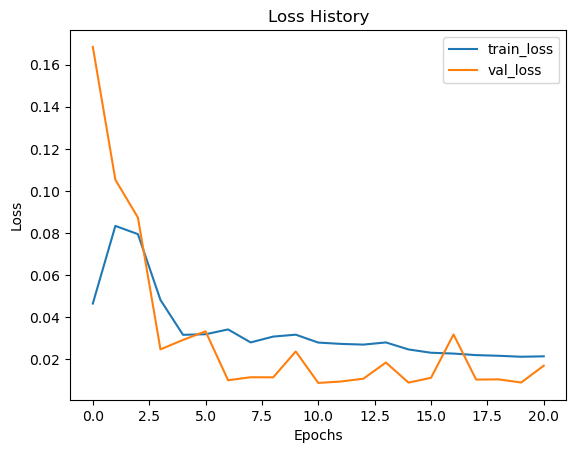

In [43]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

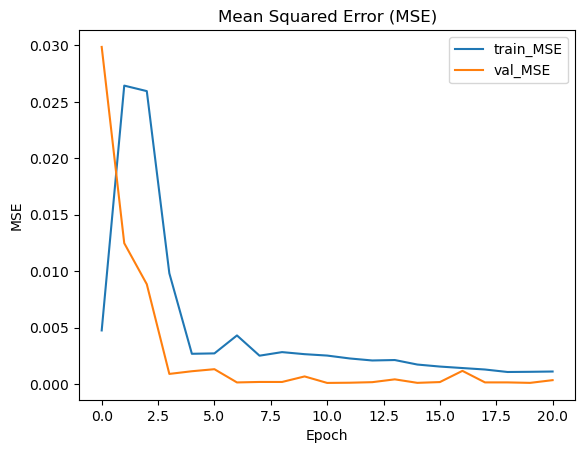

In [44]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

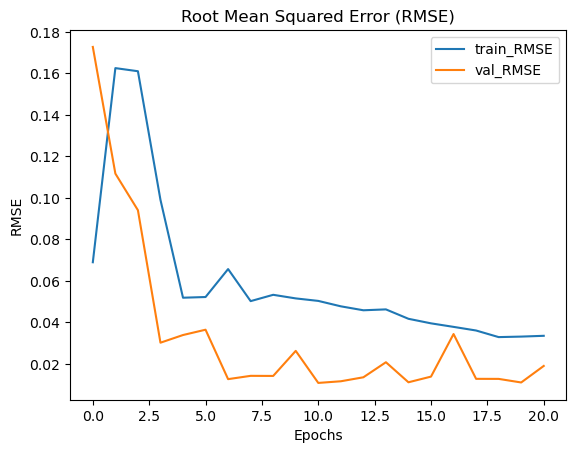

In [45]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

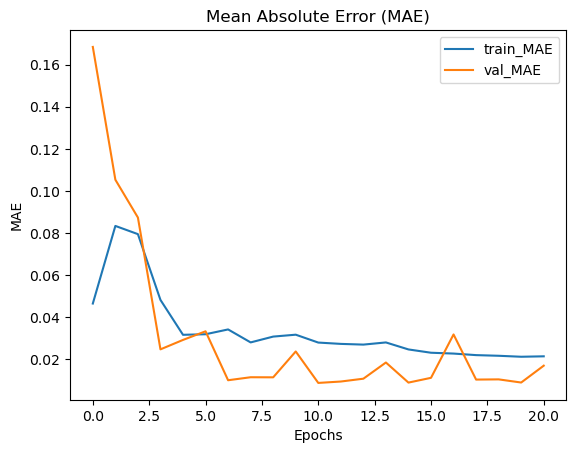

In [46]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

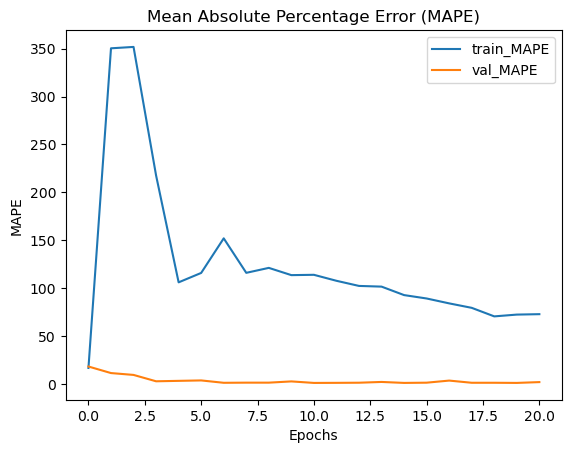

In [47]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 18:50:52.577966: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7599, 4, 2)
Labels Shape: (7599, 1, 1)
Prediction Shape: (7599, 1, 10)


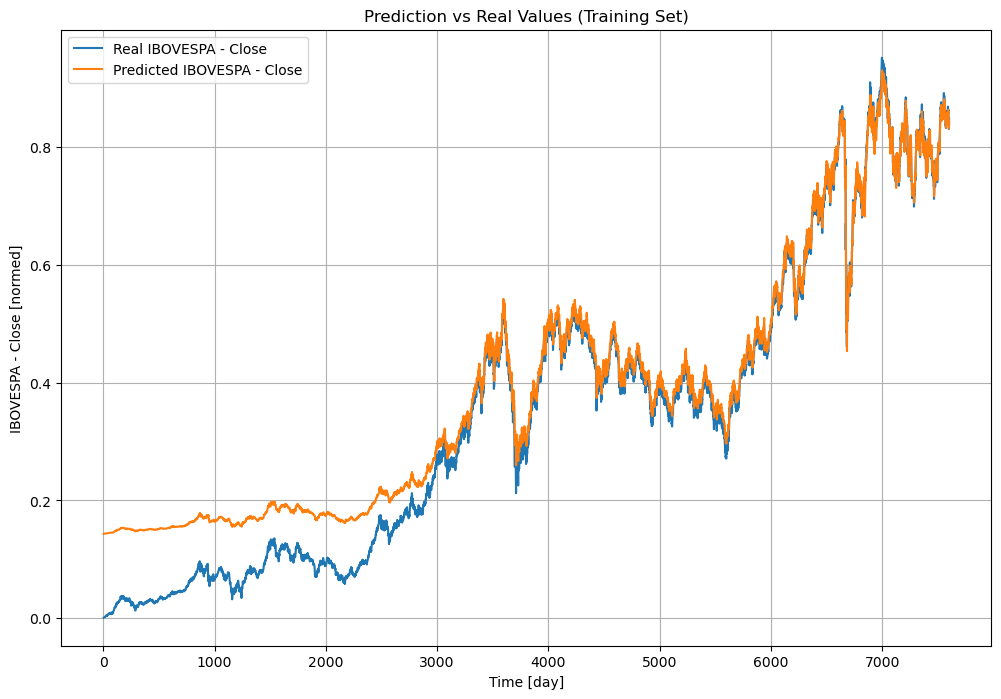

In [48]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (257, 4, 2)
Labels Shape: (257, 1, 1)
Prediction Shape: (257, 1, 10)


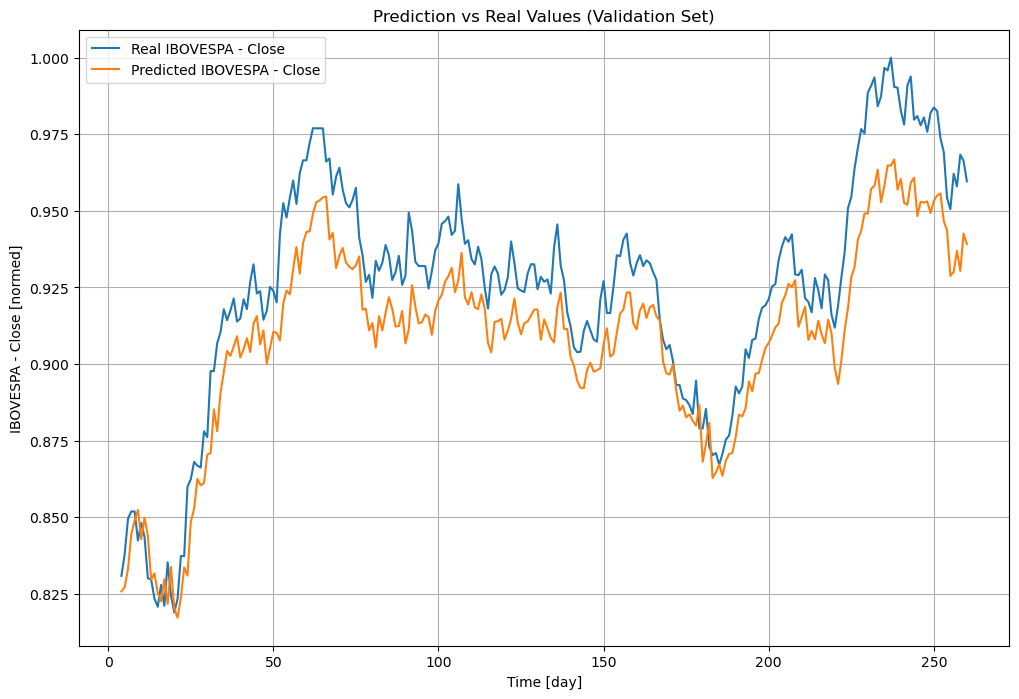

In [49]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (125, 4, 2)
Labels Shape: (125, 1, 1)
Prediction Shape: (125, 1, 10)


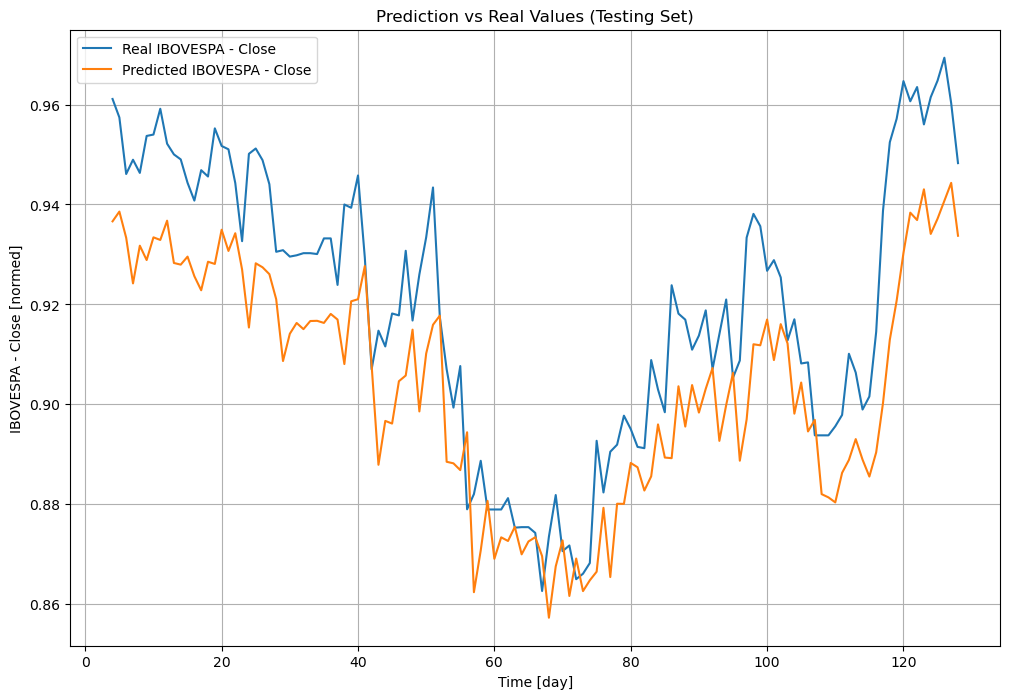

In [50]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

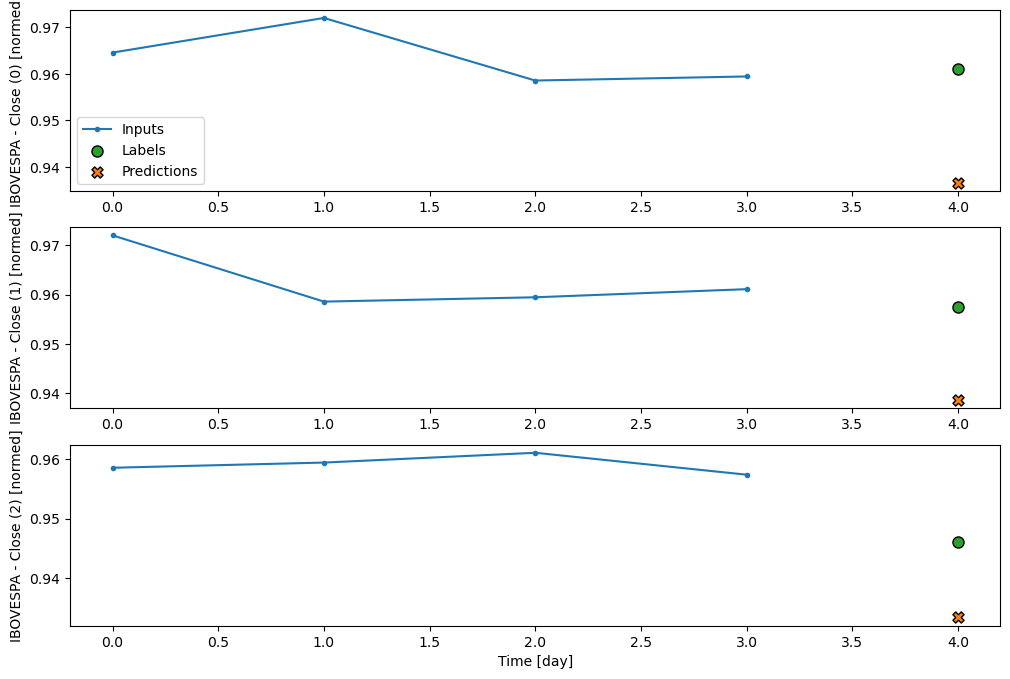

In [51]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [52]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:0m:59s:372ms


In [53]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/4 ━━━━━━━━━━━━━━━━━━━━ 1s 374ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step


array([[[0.9366288 , 0.9366288 , 0.9366288 , ..., 0.9366288 ,
         0.9366288 , 0.9366288 ]],

       [[0.9385811 , 0.9385811 , 0.9385811 , ..., 0.9385811 ,
         0.9385811 , 0.9385811 ]],

       [[0.93333673, 0.93333673, 0.93333673, ..., 0.93333673,
         0.93333673, 0.93333673]],

       ...,

       [[0.94075876, 0.94075876, 0.94075876, ..., 0.94075876,
         0.94075876, 0.94075876]],

       [[0.9443286 , 0.9443286 , 0.9443286 , ..., 0.9443286 ,
         0.9443286 , 0.9443286 ]],

       [[0.9337443 , 0.9337443 , 0.9337443 , ..., 0.9337443 ,
         0.9337443 , 0.9337443 ]]], shape=(125, 1, 10), dtype=float32)

In [54]:
prediction.shape

(125, 1, 10)

Salvar e carregar modelo

In [55]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')